# 🧮 Skill Damage Simulation & Analysis Framework

This project models and compares **combat damage output** across multiple adventurers, using a detailed simulation framework that incorporates **weapon coefficients**, **damage types**, **combat rounds**, and **passive/gear-based buffs**. It is built to analyze **per-skill performance**, **multi-round cumulative damage**, and the **relative impact of build choices** in a configurable and extensible way.

---

## 🎯 Project Objectives

* 📊 **Compare skill performance** across adventurers (Leonardo, Gagarin, Dragon Girl)
* 🔁 **Simulate multi-round combat**, tracking total and per-skill damage
* ⚖️ **Normalize performance** to a baseline (e.g., Leonardo) for relative analysis
* 🧪 **Test build variations** using configurable `SCENARIO` dictionaries
* 🧠 **Support strategy optimization** through data analysis and clear visualizations

---

## 🧱 System Architecture

### 1. 🔧 Scenario Configuration

Each scenario defines a simulated build using a dictionary of modifiers:

```python
SCENARIO = {
    "Num_Daggers": 25,
    "Dagger_DMG_pct": 85,
    "Physical_DMG_pct": 90,
    "Bonus_Dagger_Coef": 0.09,
    "Num_Rage_Strikes": 3
}
```

These modify attributes like bonus coefficients, damage types, skill hit counts, and more.

### 2. 🧠 Skill & Damage Simulation

Each adventurer has a dedicated simulation function that:

* Applies adventurer-specific **passives and scaling**
* Uses shared helper utilities to compute:

  * `Final_ATK`
  * Per-skill base + bonus coefficients
  * Buff interactions (e.g., global%, final%, relative damage)
  * Crit multipliers (if applicable)
* Tracks **round-by-round skill usage**, cooldowns, and delayed effects

Helper functions:

* `compute_damage()` – Core per-hit damage calculator
* `apply_adventurer_passives()` – Injects unit-specific bonuses into config
* `calculate_final_atk()` – Centralized ATK calculation formula

### 3. 📊 Output Aggregation

Two primary dataframes:

* `df_all_skills` – per-skill, per-use damage (for scaling comparisons)
* `df_final_round` – total 10-round cumulative damage per unit per scenario

Round-level logic includes:

* Handling of skill cooldowns (e.g., Leonardo’s HSD every 2–3 turns)
* Delayed damage triggers (e.g., Gagarin’s bomb after 2 rounds)

### 4. 📈 Visualization Tools

Custom plots help explore:

* Skill scaling across levels
* Total cumulative output by adventurer
* Normalized comparisons (e.g., vs. Leonardo)
* Damage composition breakdowns (daggers, rage, missiles, etc.)
* Percent difference plots to evaluate buffs and gem effects

---

## 🧪 Example Use Cases

### Simulate 10-round damage for multiple adventurers:

```python
df_leo_skill, df_leo_rounds = run_leo_scenario(SCENARIO_X, "Scenario 1")
df_gaga_skill, df_gaga_rounds = run_gaga_scenario(SCENARIO_X, "Scenario 1")
df_dg_skill, df_dg_rounds     = run_dg_scenario(SCENARIO_X, "Scenario 1")
```

### Merge and compare cumulative outputs:

```python
df_final_round = pd.concat([df_leo_rounds, df_gaga_rounds, df_dg_rounds])
```

### Normalize relative to Leonardo:

```python
df_baseline = df_final_round[df_final_round["source"] == "leonardo"]
df_final_round = df_final_round.merge(df_baseline, on=["level", "scenario"], suffixes=("", "_leo"))
df_final_round["normalized"] = df_final_round["total_damage"] / df_final_round["total_damage_leo"]
```

---

## ⚙️ Assumptions & Formulas

### 🎯 Player Base Stats

```python
P_ATK = 10_000_000
P_Strength = 1.15
P_ATK_pct = 3000           # +3000%
P_Global_ATK_pct = 250     # +250%
```

Final ATK formula:

```python
Final_ATK = P_ATK × Strength × (1 + P_ATK_pct/100) × (1 + Global_ATK_pct/100)
```

### 💀 Enemy Stats

```python
A_DEF = 0
Target_HP = 3_500_000_000_000  # Used for %HP-based skills and caps
```

---

## 📊 Key Visualizations

* **📈 Line Plot**: Damage per skill per level
* **📊 Bar Plot**: Normalized damage vs Leonardo
* **📦 Stacked Bar**: Component-wise damage breakdown
* **🌀 Line Plot**: Cumulative damage across 10 rounds
* **📉 Delta Charts**: Percent difference between scenarios


In [1]:
# === [1] Individual Named Constants ===

# Core stats
P_ATK = "P_ATK"
P_Strength = "P_Strength"
P_ATK_pct = "P_ATK_pct"
P_Global_ATK_pct = "P_Global_ATK_pct"

# Crit
Crit_Chance_pct = "Crit_Chance_pct"
Skill_Crit_Chance_pct = "Skill_Crit_Chance_pct"
Weapon_Crit_Chance_pct = "Weapon_Crit_Chance_pct"
Basic_Crit_Chance_pct = "Basic_Crit_Chance_pct"
Crit_DMG_pct = "Crit_DMG_pct"

# Local modifiers
Skill_DMG_pct = "Skill_DMG_pct"
Physical_DMG_pct = "Physical_DMG_pct"
Dagger_DMG_pct = "Dagger_DMG_pct"
Bolt_DMG_pct = "Bolt_DMG_pct"
Chi_DMG_pct = "Chi_DMG_pct"
Dragon_Flame_DMG_pct = "Dragon_Flame_DMG_pct"
Fire_DMG_pct = "Fire_DMG_pct"
Ice_DMG_pct = "Ice_DMG_pct"
Lightning_DMG_pct = "Lightning_DMG_pct"
Basic_ATK_DMG_pct = "Basic_ATK_DMG_pct"
Combo_DMG_pct = "Combo_DMG_pct"
Rage_DMG_pct = "Rage_DMG_pct"
Counter_DMG_pct = "Counter_DMG_pct"
Poison_DMG_pct = "Poison_DMG_pct"
Burn_DMG_pct = "Burn_DMG_pct"
Light_Spear_DMG_pct = "Light_Spear_DMG_pct"
DoT_DMG_pct = "DoT_DMG_pct"
Ninjutsu_DMG_pct = "Ninjutsu_DMG_pct"
Damage_pct = "Damage_pct"

# === [GLOBAL MODIFIERS – Individual Constants] ===
Global_Skill_DMG_pct = "Global_Skill_DMG_pct"
Global_Physical_DMG_pct = "Global_Physical_DMG_pct"
Global_Dagger_DMG_pct = "Global_Dagger_DMG_pct"
Global_Bolt_DMG_pct = "Global_Bolt_DMG_pct"
Global_Chi_DMG_pct = "Global_Chi_DMG_pct"
Global_Dragon_Flame_DMG_pct = "Global_Dragon_Flame_DMG_pct"
Global_Fire_DMG_pct = "Global_Fire_DMG_pct"
Global_Ice_DMG_pct = "Global_Ice_DMG_pct"
Global_Lightning_DMG_pct = "Global_Lightning_DMG_pct"
Global_Basic_ATK_DMG_pct = "Global_Basic_ATK_DMG_pct"
Global_Combo_DMG_pct = "Global_Combo_DMG_pct"
Global_Rage_DMG_pct = "Global_Rage_DMG_pct"
Global_Counter_DMG_pct = "Global_Counter_DMG_pct"
Global_Poison_DMG_pct = "Global_Poison_DMG_pct"
Global_Burn_DMG_pct = "Global_Burn_DMG_pct"
Global_Light_Spear_DMG_pct = "Global_Light_Spear_DMG_pct"
Global_DoT_DMG_pct = "Global_DoT_DMG_pct"
Global_Ninjutsu_DMG_pct = "Global_Ninjutsu_DMG_pct"
Global_DMG_pct = "Global_DMG_pct"  # universal global


# Bonus Coef
Bonus_Dagger_Coef = "Bonus_Dagger_Coef"
Bonus_Bolt_Coef = "Bonus_Bolt_Coef"
Bonus_Chi_Coef = "Bonus_Chi_Coef"
Bonus_Rage_Coef = "Bonus_Rage_Coef"
Bonus_Light_Spear_Coef = "Bonus_Light_Spear_Coef"
Bonus_Icy_Spike_Coef = "Bonus_Icy_Spike_Coef"
Bonus_Basic_Coef = "Bonus_Basic_Coef"
Bonus_Combo_Coef = "Bonus_Combo_Coef"
Bonus_Counter_Coef = "Bonus_Counter_Coef"
Bonus_Poison_Coef = "Bonus_Poison_Coef"
Bonus_Burn_Coef = "Bonus_Burn_Coef"
Bonus_Lightning_Coef = "Bonus_Lightning_Coef"
Bonus_Fire_Coef = "Bonus_Fire_Coef"

# Skill usage counts
Num_Combos = "Num_Combos"
Num_Basic_Attacks = "Num_Basic_Attacks"
Num_Daggers = "Num_Daggers"
Num_Rage_Strikes = "Num_Rage_Strikes"
Num_Bolts = "Num_Bolts"
Num_Death_Bolts = "Num_Death_Bolts"
Num_Chi_Hits = "Num_Chi_Hits"
Num_Burns = "Num_Burns"
Num_Poisons = "Num_Poisons"
Num_Light_Spears = "Num_Light_Spears"
Num_Icy_Spikes = "Num_Icy_Spikes"
Num_Counter_Attacks = "Num_Counter_Attacks"
Num_Ninjutsu_Skills = "Num_Ninjutsu_Skills"
Num_Dragon_Flame_Skills = "Num_Dragon_Flame_Skills"

# DoT
Max_Poison_Stacks = "Max_Poison_Stacks"
Max_Burn_Stacks = "Max_Burn_Stacks"

# Final Modifiers
Final_DMG_pct = "Final_DMG_pct"  # Add this earlier in your constants if not already there

# Env
Rage_ATK_coef = "Rage_ATK_coef"
ENEMY_HP = "ENEMY_HP"
MAX_HP = "MAX_HP"


In [2]:
# === Grouped Lists Built from Constants ===

PLAYER_STAT_KEYS = [P_ATK, P_Strength, P_ATK_pct, P_Global_ATK_pct]

CRIT_KEYS = [
    Crit_Chance_pct, Skill_Crit_Chance_pct,
    Weapon_Crit_Chance_pct, Basic_Crit_Chance_pct, Crit_DMG_pct
]

LOCAL_MOD_KEYS = [
    Skill_DMG_pct, Physical_DMG_pct, Dagger_DMG_pct, Bolt_DMG_pct, Chi_DMG_pct,
    Dragon_Flame_DMG_pct, Fire_DMG_pct, Ice_DMG_pct, Lightning_DMG_pct,
    Basic_ATK_DMG_pct, Combo_DMG_pct, Rage_DMG_pct, Counter_DMG_pct,
    Poison_DMG_pct, Burn_DMG_pct, Light_Spear_DMG_pct, DoT_DMG_pct,
    Damage_pct, Ninjutsu_DMG_pct
]

GLOBAL_MOD_KEYS = [
    Global_Skill_DMG_pct, Global_Physical_DMG_pct, Global_Dagger_DMG_pct,
    Global_Bolt_DMG_pct, Global_Chi_DMG_pct, Global_Dragon_Flame_DMG_pct,
    Global_Fire_DMG_pct, Global_Ice_DMG_pct, Global_Lightning_DMG_pct,
    Global_Basic_ATK_DMG_pct, Global_Combo_DMG_pct, Global_Rage_DMG_pct,
    Global_Counter_DMG_pct, Global_Poison_DMG_pct, Global_Burn_DMG_pct,
    Global_Light_Spear_DMG_pct, Global_DoT_DMG_pct, Global_Ninjutsu_DMG_pct,
    Global_DMG_pct
]

BONUS_COEF_KEYS = [
    Bonus_Dagger_Coef, Bonus_Bolt_Coef, Bonus_Chi_Coef, Bonus_Rage_Coef,
    Bonus_Light_Spear_Coef, Bonus_Icy_Spike_Coef, Bonus_Basic_Coef,
    Bonus_Combo_Coef, Bonus_Counter_Coef, Bonus_Poison_Coef,
    Bonus_Burn_Coef, Bonus_Lightning_Coef, Bonus_Fire_Coef
]

SKILL_COUNT_KEYS = [
    Num_Combos, Num_Basic_Attacks, Num_Daggers, Num_Rage_Strikes,
    Num_Bolts, Num_Death_Bolts, Num_Chi_Hits, Num_Burns, Num_Poisons,
    Num_Light_Spears, Num_Icy_Spikes, Num_Counter_Attacks,
    Num_Ninjutsu_Skills, Num_Dragon_Flame_Skills
]

DOT_STACK_KEYS = [Max_Poison_Stacks, Max_Burn_Stacks]

ENVIRONMENT_KEYS = [ENEMY_HP, MAX_HP]

ALL_CONFIG_KEYS = (
    PLAYER_STAT_KEYS + CRIT_KEYS + LOCAL_MOD_KEYS + GLOBAL_MOD_KEYS +
    BONUS_COEF_KEYS + SKILL_COUNT_KEYS + DOT_STACK_KEYS + ENVIRONMENT_KEYS
)


ALL_KEYS = (
    PLAYER_STAT_KEYS +
    CRIT_KEYS +
    LOCAL_MOD_KEYS +
    GLOBAL_MOD_KEYS +
    BONUS_COEF_KEYS +
    SKILL_COUNT_KEYS +
    DOT_STACK_KEYS +
    ENVIRONMENT_KEYS +
    [Final_DMG_pct]
)


In [3]:


# === [2] DEFAULT_VALUES using Constants ===

DEFAULT_VALUES = {
    # Core stats
    P_ATK: 10_000_000,
    P_Strength: 1.15,
    P_ATK_pct: 3000,
    P_Global_ATK_pct: 250,

    # Crit
    Crit_Chance_pct: 100,
    Skill_Crit_Chance_pct: 100,
    Weapon_Crit_Chance_pct: 100,
    Basic_Crit_Chance_pct: 100,
    Crit_DMG_pct: 500,

    Num_Basic_Attacks: 1,
    Num_Combos: 4,
    Num_Rage_Strikes: 1,

    Skill_DMG_pct: 100,

    # Final
    Final_DMG_pct: 0,

    # DoT Stack Settings
    Max_Poison_Stacks: 5,
    Max_Burn_Stacks: 5,

    # Environment
    Rage_ATK_coef: 2.6,
    ENEMY_HP: 3_500_000_000,
    MAX_HP: 3_500_000_000,
}

# All remaining keys default to 0
for key in ALL_KEYS:
    if key not in DEFAULT_VALUES:
        DEFAULT_VALUES[key] = 0

# === [3] BASE_CONFIG constructed from defaults
BASE_CONFIG = dict(DEFAULT_VALUES)

# === [4] Scenario Definitions using constants

# SCENARIO_1 = {
#     "name": "200% skill dmg, 40% global skill dmg",
#     Global_Skill_DMG_pct: 40,
#     Skill_DMG_pct: 200,
# }


# SCENARIO_2 = {
#     "name": "400% skill dmg, 40% global skill dmg",
#     Global_Skill_DMG_pct: 40,
#     Skill_DMG_pct: 400,
# }

SCENARIO_1 = {
    "name": "",
    Num_Rage_Strikes: 1,
    Num_Combos: 1,
    Global_Skill_DMG_pct: 0,
    Global_DMG_pct: 0,
    Skill_DMG_pct: 0,
}


SCENARIO_2 = {
    "name": "",
    Num_Daggers: 21,
    Bonus_Dagger_Coef: 0.09,
    Dagger_DMG_pct: 85,
    Physical_DMG_pct: 90,
    Num_Rage_Strikes: 3,
    Damage_pct: 25,
    Global_Skill_DMG_pct: 40,
    Global_DMG_pct: 30,
    Skill_DMG_pct: 200,
}

# # reaper staff test

# SCENARIO_1 = {
#     "name": "base",
#     "Skill_DMG_pct": 100,
# }

# SCENARIO_2 = {
#     "name": "spell dmg",
#     "Skill_DMG_pct": 500,
# }
# SCENARIO_1 = {
#     "name": "base",
# }

# SCENARIO_2 = {
#     "name": "Reaper staff",
#     "Num_Rage_Strikes": 2,
#     "Damage_pct": 25,
#     "Global_Skill_DMG_pct": 40,
#     "Skill_DMG_pct": 600,
#     "Num_Bolts": 2,
#     "Num_Death_Bolts": 4, # 40% chance for death bolt, or 60% at a10
#     "Lightning_DMG_pct": 90,
#     "Bonus_Lightning_Coef": 0.06,
# }
SCENARIO_1


{'name': '',
 'Num_Rage_Strikes': 1,
 'Num_Combos': 1,
 'Global_Skill_DMG_pct': 0,
 'Global_DMG_pct': 0,
 'Skill_DMG_pct': 0}

In [4]:
import pandas as pd

# === [1] Auto-Generated Short Name Map ===

def build_short_name_map():
    short_names = {}

    # Count keys → N_<Skill>
    for key in SKILL_COUNT_KEYS:
        base = key.replace("Num_", "")
        short_names[key] = f"N_{base}"

    # Bonus Coefficients → C_<Skill>
    for key in BONUS_COEF_KEYS:
        base = key.replace("Bonus_", "").replace("_Coef", "")
        short_names[key] = f"C_{base}"

    # Global Modifiers → G_<Skill>
    for key in GLOBAL_MOD_KEYS:
        base = key.replace("Global_", "").replace("_pct", "")
        short_names[key] = f"G_{base}"

    # Local Modifiers → D_<Skill>
    for key in LOCAL_MOD_KEYS:
        base = key.replace("_pct", "")
        short_names[key] = f"D_{base}"

    # Other singleton keys using constants
    short_names[Final_DMG_pct] = "Final"
    short_names[Damage_pct] = "D_All"
    short_names[Crit_DMG_pct] = "CritD"
    short_names[Crit_Chance_pct] = "Crit%"
    short_names[Skill_Crit_Chance_pct] = "SkillCrit%"
    short_names[Weapon_Crit_Chance_pct] = "WpnCrit%"
    short_names[Basic_Crit_Chance_pct] = "BasicCrit%"

    return short_names


SHORT_NAME_MAP = build_short_name_map()

# === [2] Generate Scenario Name ===

def generate_scenario_name(base_scenario: dict, compare_scenario: dict) -> str:
    """
    Generate a scenario name string based on differences from a base config.
    """
    diffs = []
    for key, val in compare_scenario.items():
        if key == "name":
            continue
        base_val = base_scenario.get(key, None)
        if val != base_val:
            short_label = SHORT_NAME_MAP.get(key, key)
            if isinstance(val, float):
                val_str = f"{val:.2f}" if abs(val) < 1 else f"{val:.0f}"
            else:
                val_str = str(val)
            diffs.append(f"{short_label}={val_str}")
    return "Δ: " + ", ".join(diffs) if diffs else "Same"

# === [3] Apply Scenario to Base Config ===

def apply_scenario_config(base_config: dict, scenario_overrides: dict) -> dict:
    """
    Apply scenario overrides to a base config dictionary.
    Ignores the 'name' key.
    """
    config = base_config.copy()
    overrides = {k: v for k, v in scenario_overrides.items() if k != "name"}
    config.update(overrides)
    return config

# === [4] Assign Scenario Names and Apply ===

SCENARIO_1["name"] = generate_scenario_name({}, SCENARIO_1)
SCENARIO_2["name"] = generate_scenario_name(SCENARIO_1, SCENARIO_2)

cfg1 = apply_scenario_config(BASE_CONFIG, SCENARIO_1)
cfg2 = apply_scenario_config(BASE_CONFIG, SCENARIO_2)


In [5]:
def make_skill(
    coef=None,
    bonus_coef_key=None,
    local_mods=None,
    global_mods=None,
    count_key=None,
    **kwargs
):
    return {
        "coef": coef,
        "bonus_coef_key": bonus_coef_key,
        "local_mods": local_mods or [],
        "global_mods": global_mods or [],
        "count_key": count_key,
        **kwargs,
    }


DAMAGE_SKILLS = {
    "basic_attack": make_skill(
        coef=1.0,
        bonus_coef_key=Bonus_Basic_Coef,
        local_mods=[Basic_ATK_DMG_pct, Damage_pct],
        global_mods=[Global_Basic_ATK_DMG_pct, Global_DMG_pct],
        count_key=Num_Basic_Attacks
    ),
    "combo_attack": make_skill(
        coef=1.0,
        bonus_coef_key=Bonus_Combo_Coef,
        local_mods=[Basic_ATK_DMG_pct, Combo_DMG_pct, Damage_pct],
        global_mods=[Global_Basic_ATK_DMG_pct, Global_Combo_DMG_pct, Global_DMG_pct],
        count_key=Num_Combos
    ),
    "dagger": make_skill(
        coef=0.45,
        bonus_coef_key=Bonus_Dagger_Coef,
        local_mods=[Dagger_DMG_pct, Physical_DMG_pct, Skill_DMG_pct, Damage_pct],
        global_mods=[Global_Dagger_DMG_pct, Global_Physical_DMG_pct, Global_Skill_DMG_pct, Global_DMG_pct],
        count_key=Num_Daggers
    ),
    "bolt": make_skill(
        coef=0.3,
        bonus_coef_key=[Bonus_Bolt_Coef, Bonus_Lightning_Coef],
        local_mods=[Bolt_DMG_pct, Lightning_DMG_pct, Skill_DMG_pct, Damage_pct],
        global_mods=[Global_Bolt_DMG_pct, Global_Lightning_DMG_pct, Global_Skill_DMG_pct, Global_DMG_pct],
        count_key=Num_Bolts
    ),
    "death_bolt": make_skill(
        coef=0.9,
        bonus_coef_key=[Bonus_Bolt_Coef, Bonus_Lightning_Coef],
        local_mods=[Bolt_DMG_pct, Lightning_DMG_pct, Skill_DMG_pct, Damage_pct],
        global_mods=[Global_Bolt_DMG_pct, Global_Lightning_DMG_pct, Global_Skill_DMG_pct, Global_DMG_pct],
        count_key=Num_Death_Bolts
    ),
    "chi": make_skill(
        coef=0.7,
        bonus_coef_key=Bonus_Chi_Coef,
        local_mods=[Chi_DMG_pct, Physical_DMG_pct, Skill_DMG_pct, Damage_pct],
        global_mods=[Global_Chi_DMG_pct, Global_Physical_DMG_pct, Global_Skill_DMG_pct, Global_DMG_pct],
        count_key=Num_Chi_Hits
    ),
    "rage": make_skill(
        coef=2.0,
        bonus_coef_key=Bonus_Rage_Coef,
        local_mods=[Rage_DMG_pct, Skill_DMG_pct, Damage_pct],
        global_mods=[Global_Rage_DMG_pct, Global_Skill_DMG_pct, Global_DMG_pct],
        count_key=Num_Rage_Strikes
    ),
    "icy_spike": make_skill(
        coef=0.3,
        bonus_coef_key=Bonus_Icy_Spike_Coef,
        local_mods=[Ice_DMG_pct, Skill_DMG_pct, Damage_pct],
        global_mods=[Global_Ice_DMG_pct, Global_Skill_DMG_pct, Global_DMG_pct],
        count_key=Num_Icy_Spikes
    ),
    "poison_dot": make_skill(
        coef=0.2,
        bonus_coef_key=Bonus_Poison_Coef,
        local_mods=[Poison_DMG_pct, DoT_DMG_pct, Damage_pct],
        global_mods=[Global_Poison_DMG_pct, Global_DoT_DMG_pct, Global_DMG_pct],
        count_key=Num_Poisons,
        stack_param=Max_Poison_Stacks
    ),
    "burn_dot": make_skill(
        coef=0.3,
        bonus_coef_key=Bonus_Burn_Coef,
        local_mods=[Burn_DMG_pct, Fire_DMG_pct, DoT_DMG_pct, Damage_pct],
        global_mods=[Global_Burn_DMG_pct, Global_Fire_DMG_pct, Global_DoT_DMG_pct, Global_DMG_pct],
        count_key=Num_Burns,
        stack_param=Max_Burn_Stacks
    ),
    "light_spear": make_skill(
        coef=0.3,
        bonus_coef_key=Bonus_Light_Spear_Coef,
        local_mods=[Light_Spear_DMG_pct, Physical_DMG_pct, Skill_DMG_pct, Damage_pct],
        global_mods=[Global_Light_Spear_DMG_pct, Global_Physical_DMG_pct, Global_Skill_DMG_pct, Global_DMG_pct],
        count_key=Num_Light_Spears
    ),
    "counter": make_skill(
        coef=1.0,
        bonus_coef_key=Bonus_Counter_Coef,
        local_mods=[Counter_DMG_pct, Damage_pct],
        global_mods=[Global_Counter_DMG_pct, Global_DMG_pct],
        count_key=Num_Counter_Attacks
    ),
    "ninjutsu_skill": make_skill(
        coef=1.0,
        local_mods=[Skill_DMG_pct, Ninjutsu_DMG_pct, Damage_pct],
        global_mods=[Global_Skill_DMG_pct, Global_Ninjutsu_DMG_pct, Global_DMG_pct],
        count_key=Num_Ninjutsu_Skills
    ),
    "dragon_flame_skill": make_skill(
        coef=None,
        bonus_types=[Skill_DMG_pct, Dragon_Flame_DMG_pct, Damage_pct],
        global_bonus_types=[Global_Skill_DMG_pct, Global_DMG_pct, Global_Dragon_Flame_DMG_pct],
        final_bonus_type=Final_DMG_pct,
        count_key=Num_Dragon_Flame_Skills
    )
}


In [6]:
from typing import Dict
import copy

from typing import Optional
from dataclasses import dataclass

from config.constants import (
    P_ATK, P_ATK_pct, P_Global_ATK_pct, Final_DMG_pct,
    Crit_Chance_pct, Crit_DMG_pct,
    Skill_Crit_Chance_pct, Weapon_Crit_Chance_pct, Basic_Crit_Chance_pct,
    Rage_ATK_coef
)

@dataclass
class DamageBreakdown:
    skill: str
    count: int
    base_coef: float
    bonus_coef: float
    total_coef: float

    final_atk: float
    local_multiplier: float
    global_multiplier: float
    final_multiplier: float
    crit_multiplier: float  # NEW

    _total_damage: Optional[float] = None

    def __post_init__(self):
        if self._total_damage is not None:
            self.total_damage = self._total_damage
        else:
            per_hit = (
                self.final_atk
                * self.total_coef
                * self.local_multiplier
                * self.global_multiplier
                * self.final_multiplier
                * self.crit_multiplier  # APPLY crit multiplier
            )
            self.total_damage = per_hit * self.count

    def as_dict(self):
        return {
            "Skill": self.skill,
            "Count": self.count,
            "BaseCoef": self.base_coef,
            "BonusCoef": self.bonus_coef,
            "TotalCoef": self.total_coef,
            "FinalATK": self.final_atk,
            "LocalMult": self.local_multiplier,
            "GlobalMult": self.global_multiplier,
            "FinalMult": self.final_multiplier,
            "CritMult": self.crit_multiplier,
            "TotalDamage": self.total_damage,
        }


def get_expected_crit_multiplier(config: dict, skill_type: str) -> float:
    crit_chance = config.get(Crit_Chance_pct, 0)

    if skill_type == "basic_attack":
        crit_chance += config.get(Basic_Crit_Chance_pct, 0) + config.get(Weapon_Crit_Chance_pct, 0)
    elif skill_type in {"combo_attack", "rage", "counter"}:
        crit_chance += config.get(Weapon_Crit_Chance_pct, 0)
    elif skill_type in {"burn_dot", "poison_dot"}:
        return 1.0
    else:
        crit_chance += config.get(Skill_Crit_Chance_pct, 0)

    crit_chance = min(100, crit_chance)
    crit_dmg = config.get(Crit_DMG_pct, 0)
    return (1 - crit_chance / 100) + (crit_chance / 100) * (1 + crit_dmg / 100)


def calculate_final_atk(config: dict, strength: float = 1.15) -> float:
    return (
        config[P_ATK]
        * strength
        * (1 + config[P_ATK_pct] / 100)
        * (1 + config[P_Global_ATK_pct] / 100)
        * (1 + config[Final_DMG_pct] / 100)
    )


def compute_damage_breakdown(skill: str, config: dict, final_atk: float, base_coef: float = None) -> Optional[DamageBreakdown]:
    meta = DAMAGE_SKILLS.get(skill)
    if not meta:
        return None

    count_key = meta.get("count_key") or meta.get("stack_param")
    count = config.get(count_key, 0)
    if count == 0:
        return None

    if base_coef is None:
        base_coef = meta.get("coef", 1.0)

    bonus_key = meta.get("bonus_coef_key")
    if isinstance(bonus_key, list):
        bonus_coef = sum(config.get(k, 0) for k in bonus_key)
    else:
        bonus_coef = config.get(bonus_key, 0) if bonus_key else 0
    total_coef = base_coef + bonus_coef

    local_multiplier = 1 + sum(config.get(mod, 0) for mod in meta.get("local_mods", [])) / 100
    global_multiplier = 1 + sum(config.get(mod, 0) for mod in meta.get("global_mods", [])) / 100
    final_multiplier = 1 + config.get(meta.get("final_bonus_type", ""), 0) / 100
    crit_multiplier = get_expected_crit_multiplier(config, skill)

    return DamageBreakdown(
        skill=skill,
        count=count,
        base_coef=base_coef,
        bonus_coef=bonus_coef,
        total_coef=total_coef,
        final_atk=final_atk,
        local_multiplier=local_multiplier,
        global_multiplier=global_multiplier,
        final_multiplier=final_multiplier,
        crit_multiplier=crit_multiplier,
    )


def compute_damage(skill: str, config: dict, final_atk: float, base_coef: float = 1.0, extra_mods: list[str] = None) -> float:
    meta = DAMAGE_SKILLS.get(skill, {})
    local_mods = meta.get("local_mods", [])
    global_mods = meta.get("global_mods", [])

    if extra_mods:
        local_mods += [m for m in extra_mods if m not in local_mods]
        global_mods += [f"Global_{m}" for m in extra_mods if f"Global_{m}" not in global_mods]

    bonus_key = meta.get("bonus_coef_key")
    if isinstance(bonus_key, list):
        bonus_coef = sum(config.get(k, 0) for k in bonus_key)
    else:
        bonus_coef = config.get(bonus_key, 0) if bonus_key else 0

    total_coef = base_coef + bonus_coef
    local_multiplier = 1 + sum(config.get(mod, 0) for mod in local_mods) / 100
    global_multiplier = 1 + sum(config.get(mod, 0) for mod in global_mods) / 100
    final_multiplier = 1 + config.get(meta.get("final_bonus_type", ""), 0) / 100
    crit_multiplier = get_expected_crit_multiplier(config, skill)

    return (
        final_atk
        * total_coef
        * local_multiplier
        * global_multiplier
        * final_multiplier
        * crit_multiplier
    )


def compute_all_damage(config: dict, strength: float = 1.15) -> dict:
    final_atk = calculate_final_atk(config, strength)
    results = {}
    breakdowns = {}

    for skill_type, meta in DAMAGE_SKILLS.items():
        count_key = meta.get("count_key") or meta.get("stack_param")
        if not count_key:
            raw = skill_type.replace("_dot", "")
            camel = "".join(w.capitalize() for w in raw.split("_"))
            count_key = f"Num_{camel}s"

        count = config.get(count_key, 0)
        if count == 0:
            continue

        base_coef = config.get(Rage_ATK_coef) if skill_type == "rage" else None
        b = compute_damage_breakdown(skill_type, config, final_atk, base_coef)
        if b:
            results[skill_type] = b.total_damage
            breakdowns[skill_type] = b

    return {
        "total_damage": results,
        "breakdowns": breakdowns
    }


# === Optional: Utility to Guess Bonus Key from Skill ===
def to_bonus_key(skill: str) -> str:
    parts = skill.replace("_dot", "").split("_")
    return "Bonus_" + "".join(p.capitalize() for p in parts) + "_Coef"

# === Scenario Override Utility ===
def apply_scenario_config(base_config: dict, scenario_overrides: dict) -> dict:
    cfg = copy.deepcopy(base_config)
    overrides = {k: v for k, v in scenario_overrides.items() if k != "name"}
    cfg.update(overrides)
    return cfg


# === Passive Injection per Adventurer ===
def apply_adventurer_passives(config: dict, level: int, adventurer: str) -> dict:
    cfg = copy.deepcopy(config)

    if adventurer == "Gagarin":
        if level >= 10:
            cfg[Global_Skill_DMG_pct] += 30
            cfg[Global_Dagger_DMG_pct] += 30
        cfg[P_Strength] = 1.20

    elif adventurer == "Leonardo":
        cfg[P_Strength] = 1.10
        if level >= 5:
            cfg[Ninjutsu_DMG_pct] += 100
            cfg[Fire_DMG_pct] += 100
            cfg[Lightning_DMG_pct] += 100
            cfg[Physical_DMG_pct] += 100
        if level >= 10:
            cfg[Global_Fire_DMG_pct] += 60
            cfg[Global_Lightning_DMG_pct] += 60
            cfg[Global_Physical_DMG_pct] += 60

    elif adventurer == "DragonGirl":
        cfg[P_Strength] = 1.15
        if level >= 4:
            cfg[Global_Dragon_Flame_DMG_pct] += 30
        if level >= 7:
            cfg[Global_Dragon_Flame_DMG_pct] += 30
        if level >= 5:
            cfg[Global_Dragon_Flame_DMG_pct] += 100
        if level >= 8:
            cfg[Final_DMG_pct] += 30

    return cfg




# dmg_breakdown = compute_all_damage(cfg1)
# output = compute_all_damage(cfg1)
# print("Total Dagger Damage:", output["total_damage"]["dagger"])

# # Print breakdown
# for skill, breakdown in output["breakdowns"].items():
#     print(breakdown.as_dict())



In [7]:
def gagarin_damage(level: int, config: dict, target_hp: float = 3_500_000_000_000):
    cfg = apply_adventurer_passives(config, level, "Gagarin")

    final_atk = calculate_final_atk(cfg, strength=cfg[P_Strength])
    shared_output = compute_all_damage(cfg, strength=cfg[P_Strength])
    shared_damage = shared_output["total_damage"]
    shared_breakdowns = shared_output["breakdowns"]

    num_daggers = cfg[Num_Daggers]
    missile_chance = 0.65 if level >= 5 else 0.50
    missile_coef = 1.00 if level >= 2 else 0.80
    bonus_dagger_coef = cfg[Bonus_Dagger_Coef]

    total_dagger_hits = (1 - missile_chance) * num_daggers
    total_missile_hits = missile_chance * num_daggers
    base_dagger_coef = 0.45
    base_missile_coef = missile_coef

    def calc_damage(hits, coef, skill):
        return compute_damage(
            skill=skill,
            config=cfg,
            final_atk=final_atk,
            base_coef=(coef + bonus_dagger_coef),
        ) * hits

    dagger_dmg = calc_damage(total_dagger_hits, base_dagger_coef, "dagger")
    missile_dmg = calc_damage(total_missile_hits, base_missile_coef, "dagger")

    # === Custom breakdown overrides for dagger and missile split ===
    if "dagger" in shared_breakdowns:
        original = shared_breakdowns["dagger"]
        
        # Split damage proportionally for daggers
        shared_breakdowns["dagger"] = DamageBreakdown(
            skill="dagger",
            count=int(total_dagger_hits),
            base_coef=base_dagger_coef,
            bonus_coef=bonus_dagger_coef,
            total_coef=base_dagger_coef + bonus_dagger_coef,
            final_atk=final_atk,
            crit_multiplier=original.crit_multiplier,
            local_multiplier=original.local_multiplier,
            global_multiplier=original.global_multiplier,
            final_multiplier=original.final_multiplier,
        )

        # Create a new breakdown entry for missiles
        shared_breakdowns["missiles"] = DamageBreakdown(
            skill="missiles",
            count=int(total_missile_hits),
            base_coef=base_missile_coef,
            bonus_coef=bonus_dagger_coef,
            total_coef=base_missile_coef + bonus_dagger_coef,
            final_atk=final_atk,
            crit_multiplier=original.crit_multiplier,
            local_multiplier=original.local_multiplier,
            global_multiplier=original.global_multiplier,
            final_multiplier=original.final_multiplier,
        )


    # Bomb damage logic
    if level < 4:
        bomb = 0
    elif level >= 7:
        bomb = compute_damage("dagger", cfg, final_atk, base_coef=(18 + bonus_dagger_coef)) + min(final_atk * 100, target_hp * 0.10)
    else:
        bomb = compute_damage("dagger", cfg, final_atk, base_coef=(9 + bonus_dagger_coef))

    output = {
        "dagger": dagger_dmg,
        "missiles": missile_dmg,
        "bomb": bomb,
        "rage": shared_damage.get("rage", 0),
        "breakdowns": shared_breakdowns
    }

    # Add remaining skill damage values from shared total_damage (e.g., light_spear, basic_attack, combo_attack, etc.)
    overridden_keys = {"dagger", "missiles", "bomb", "rage", "breakdowns"}
    for k, v in shared_damage.items():
        if k not in overridden_keys and k.lower() != "total":
            output[k] = v

    # Ensure all known skills are included (with 0 if missing)
    for key in DAMAGE_SKILLS:
        if key not in output:
            output[key] = 0.0

    output["level"] = level

    # Final aggregation
    non_damage_keys = {"level", "scenario", "source", "breakdowns", "total_gagarin"}
    output["total_gagarin"] = sum(
        v for k, v in output.items()
        if isinstance(v, (int, float)) and k not in non_damage_keys
    )

    return output

def run_gagarin_scenario(scenario_dict: dict, name: str):
    skill_rows = []
    round_rows = []
    debug_rows = []

    levels = [0, 2, 4, 5, 7, 10]
    rounds = 10

    for lvl in levels:
        base_cfg = apply_scenario_config(BASE_CONFIG, scenario_dict)

        dmg = gagarin_damage(lvl, base_cfg, target_hp=base_cfg.get(ENEMY_HP, 3_500_000_000_000))
        dmg["scenario"] = name
        dmg["source"] = "gagarin"
        skill_rows.append(dmg)

        cfg_with_passives = apply_adventurer_passives(base_cfg, lvl, "Gagarin")
        debug_rows.append({
            "level": lvl,
            P_Strength: cfg_with_passives.get(P_Strength, 0),
            Global_Skill_DMG_pct: cfg_with_passives.get(Global_Skill_DMG_pct, 0),
            Global_Dagger_DMG_pct: cfg_with_passives.get(Global_Dagger_DMG_pct, 0),
            Bonus_Dagger_Coef: cfg_with_passives.get(Bonus_Dagger_Coef, 0),
            Num_Daggers: cfg_with_passives.get(Num_Daggers, 0),
            Rage_ATK_coef: cfg_with_passives.get(Rage_ATK_coef, 0),
            Global_DMG_pct: cfg_with_passives.get(Global_DMG_pct, 0),
            Dagger_DMG_pct: cfg_with_passives.get(Dagger_DMG_pct, 0),
            Num_Light_Spears: cfg_with_passives.get(Num_Light_Spears, 0),
        })

        # Only sum relevant keys
        non_damage_keys = {"level", "scenario", "source", "total_gagarin", "breakdowns"}
        cumulative_keys = [k for k in dmg if isinstance(dmg[k], (int, float)) and k not in non_damage_keys and k != "bomb"]

        running_total = 0
        for rnd in range(1, rounds + 1):
            per_round = sum(dmg[k] for k in cumulative_keys)

            # Add bomb damage only on specific rounds
            if rnd >= 3 and rnd % 2 == 1:
                per_round += dmg.get("bomb", 0)

            running_total += per_round
            round_rows.append({
                "round": rnd,
                "level": lvl,
                "scenario": name,
                "source": "gagarin",
                "total_damage": running_total
            })

    return pd.DataFrame(skill_rows), pd.DataFrame(round_rows), pd.DataFrame(debug_rows)

df_gaga_skill_1, df_gaga_rounds_1, df_debug_1 = run_gagarin_scenario(SCENARIO_1, "Scenario 1")
df_gaga_skill_2, df_gaga_rounds_2, df_debug_2 = run_gagarin_scenario(SCENARIO_2, "Scenario 2")


In [8]:
def leo_damage(level: int, config: dict, target_hp: float = 3_500_000_000_000):
    cfg = apply_adventurer_passives(config, level, adventurer="Leonardo")
    strength = cfg.get(P_Strength, 1.10)
    final_atk = calculate_final_atk(cfg, strength)

    def sbs_damage():
        # === Fixed 3-hit sequence ===
        base_hits = [0.3, 0.7, 1.0]
        base_total_coef = sum(base_hits)  # 2.0
        base_damage = sum([
            compute_damage("basic_attack", cfg, final_atk, base_coef=coef)
            for coef in base_hits
        ])

        # === Fixed ninjutsu cast ===
        fixed_ninjutsu = compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=1.0)
        bonus_damage = fixed_ninjutsu
        bonus_coef = 1.0

        # === Conditional extra ninjutsu ===
        extra_damage = 0.0
        extra_coef = 0.0
        if level >= 2:
            ninjutsu_chance = 1 - (1 - 0.7) ** 3
            extra_damage = ninjutsu_chance * compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=1.0)
            extra_coef = ninjutsu_chance * 1.0

        # === Combine totals ===
        total_coef = base_total_coef + bonus_coef + extra_coef
        total_damage = base_damage + bonus_damage + extra_damage
        effective_count = cfg.get(Num_Basic_Attacks, 1) * cfg.get(Num_Combos, 1)

        return total_damage * effective_count, total_coef, effective_count

    def hsd_damage():
        if level < 4:
            return 0
        coef = 4 if level >= 7 else 2
        base = 5 * compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=coef)
        if level >= 7:
            hp_val = 0.02 * target_hp
            hp_cap = 20 * final_atk
            base += 5 * min(hp_val, hp_cap)
        return base

    def hsd_cd():
        return 2 if level >= 7 else 3

    def wts_damage():
        if level < 8:
            return 0
        coef = 5 if level >= 10 else 3
        return 3 * compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=coef)

    def rage_damage():
        if level >= 8:
            return 0
        return compute_damage("rage", cfg, final_atk, base_coef=cfg[Rage_ATK_coef])

    # === Compute modular skills ===
    sbs_total, sbs_coef, sbs_count = sbs_damage()
    hsd = hsd_damage()
    wts = wts_damage() * cfg.get(Num_Rage_Strikes, 1)
    rage_atk = rage_damage() * cfg.get(Num_Rage_Strikes, 1)
    cooldown = hsd_cd()

    # === Shared breakdowns ===
    shared_output = compute_all_damage(cfg, strength)
    shared_damage = shared_output["total_damage"]
    shared_breakdowns = shared_output["breakdowns"]

    for key in ["basic_attack", "combo_attack"]:
        shared_breakdowns.pop(key, None)

    def inject_breakdown(skill, total_damage, count, coef):
        shared_breakdowns[skill] = DamageBreakdown(
            skill=skill,
            count=count,
            base_coef=coef,
            bonus_coef=0.0,
            total_coef=coef,
            final_atk=final_atk,
            crit_multiplier=get_expected_crit_multiplier(cfg, skill),
            local_multiplier=1.0,
            global_multiplier=1.0,
            final_multiplier=1.0,
            _total_damage=total_damage  # <-- explicitly set this
        )


    inject_breakdown("sbs", sbs_total, count=sbs_count, coef=sbs_coef)

    if level >= 4:
        inject_breakdown("hsd", hsd, count=1, coef=10.0)
    if level >= 8:
        inject_breakdown("wts", wts, count=cfg.get(Num_Rage_Strikes, 1), coef=3.0)
    else:
        inject_breakdown("rage", rage_atk, count=cfg.get(Num_Rage_Strikes, 1), coef=cfg[Rage_ATK_coef])

    output = {
        "sbs": sbs_total,
        "hsd": hsd,
        "wts": wts,
        "rage": rage_atk,
        "basic_attack": 0.0,
        "combo_attack": 0.0,
        "cooldown": cooldown,
        "breakdowns": shared_breakdowns,
    }

    overridden_keys = {"sbs", "hsd", "wts", "rage", "basic_attack", "combo_attack", "cooldown", "breakdowns"}
    for k, v in shared_damage.items():
        if k not in overridden_keys and k.lower() != "total":
            output[k] = v

    for skill_key in DAMAGE_SKILLS:
        if skill_key not in output:
            output[skill_key] = 0.0

    output["total_leonardo"] = sum(
        v for k, v in output.items()
        if isinstance(v, (int, float)) and k not in {"level", "scenario", "source", "breakdowns", "total_leonardo", "cooldown"}
    )

    return output




def run_leo_scenario(scenario_dict: dict, name: str):
    levels = [0, 2, 4, 5, 7, 8, 10]

    skill_rows = []
    round_rows = []
    debug_rows = []

    for lvl in levels:
        base_cfg = apply_scenario_config(BASE_CONFIG, scenario_dict)
        cfg_with_passives = apply_adventurer_passives(base_cfg, lvl, "Leonardo")

        debug_rows.append({
            "level": lvl,
            P_Strength: cfg_with_passives.get(P_Strength, 0),
            Ninjutsu_DMG_pct: cfg_with_passives.get(Ninjutsu_DMG_pct, 0),
            Rage_ATK_coef: cfg_with_passives.get(Rage_ATK_coef, 0),
            Global_DMG_pct: cfg_with_passives.get(Global_DMG_pct, 0),
            Global_Skill_DMG_pct: cfg_with_passives.get(Global_Skill_DMG_pct, 0),
            "Final_ATK": calculate_final_atk(cfg_with_passives, cfg_with_passives.get(P_Strength, 1.10)),
        })

        dmg = leo_damage(lvl, base_cfg, target_hp=base_cfg.get(ENEMY_HP, 3_500_000_000_000))
        skill_rows.append({
            "source": "leonardo",
            "scenario": name,
            "level": lvl,
            **{k: v for k, v in dmg.items() if k != "cooldown"}
        })

        # === Round-by-round damage accounting ===
        total = 0
        for rnd in range(1, 11):
            round_dmg = (
                dmg["sbs"] * base_cfg.get(Num_Combos, 1)
                + dmg["wts"]
                + dmg["rage"]
            )
            if rnd % dmg["cooldown"] == 0:
                round_dmg += dmg["hsd"]

            total += round_dmg
            round_rows.append({
                "source": "leonardo",
                "scenario": name,
                "level": lvl,
                "round": rnd,
                "total_damage": total
            })

    return pd.DataFrame(skill_rows), pd.DataFrame(round_rows), pd.DataFrame(debug_rows)

df_leo_skill_1, df_leo_rounds_1, leo_debug_1 = run_leo_scenario(SCENARIO_1, "Scenario 1")
df_leo_skill_2, df_leo_rounds_2, leo_debug_2 = run_leo_scenario(SCENARIO_2, "Scenario 2")

df_leo_skill = pd.concat([df_leo_skill_1, df_leo_skill_2], ignore_index=True)
df_leo_rounds = pd.concat([df_leo_rounds_1, df_leo_rounds_2], ignore_index=True)

In [9]:
def dg_damage(level: int, config: dict, stacks: bool = True, target_hp=3_500_000_000_000):
    cfg = apply_adventurer_passives(config, level, adventurer="DragonGirl")
    strength = cfg.get(P_Strength, 1.15)
    final_atk = calculate_final_atk(cfg, strength)

    def dragon_breath():
        coef = 0.9 if level < 2 else 1.8
        return compute_damage("dragon_flame_skill", cfg, final_atk, base_coef=coef), coef

    def catastrophic_breath():
        if level < 4:
            return 0, 0
        coef = 12 if level >= 7 else 6
        return compute_damage("dragon_flame_skill", cfg, final_atk, base_coef=coef), coef

    def dragons_wrath():
        if level < 8:
            return 0
        cap = 100 * final_atk
        my_hp = cfg.get(MAX_HP, 3_500_000_000)
        return min(0.10 * my_hp, cap) + min(0.10 * target_hp, cap)

    def basic_attack_hit():
        mods = ["Basic_ATK_DMG_pct"]
        if level >= 5:
            mods.append("Global_Dragon_Flame_DMG_pct")
        return compute_damage("basic_attack", cfg, final_atk, base_coef=1.0, extra_mods=mods)

    def combo_attack_hit():
        mods = ["Basic_ATK_DMG_pct", "Combo_DMG_pct"]
        if level >= 5:
            mods.append("Global_Dragon_Flame_DMG_pct")
        return compute_damage("combo_attack", cfg, final_atk, base_coef=1.0, extra_mods=mods)

    def rage_attack_hit():
        mods = ["Rage_DMG_pct", "Skill_DMG_pct"]
        if level >= 5:
            mods.append("Global_Dragon_Flame_DMG_pct")
        return compute_damage("rage", cfg, final_atk, base_coef=cfg.get(Rage_ATK_coef, 2.0), extra_mods=mods)

    # === Calculate Core Damages ===
    basic_attack = cfg[Num_Basic_Attacks] * basic_attack_hit()
    combo_attack = cfg[Num_Combos] * combo_attack_hit()
    rage = cfg[Num_Rage_Strikes] * rage_attack_hit()

    dragon_breath_hit, dragon_breath_coef = dragon_breath()
    basic_breath = dragon_breath_hit * (cfg[Num_Basic_Attacks] + cfg[Num_Combos])
    rage_breath = dragon_breath_hit * cfg[Num_Rage_Strikes]
    breath = basic_breath + rage_breath

    catastrophic, catastrophic_coef = catastrophic_breath()
    dragon_wrath = dragons_wrath()

    # === Shared Modular Breakdown ===
    shared_output = compute_all_damage(cfg, strength)
    shared_damage = shared_output["total_damage"]
    shared_breakdowns = shared_output["breakdowns"]

    # Remove overridden entries
    for key in ["basic_attack", "combo_attack", "rage"]:
        if key in shared_breakdowns:
            del shared_breakdowns[key]

    # Inject flame skill breakdowns
    def inject_breakdown(skill, dmg, count, coef):
        shared_breakdowns[skill] = DamageBreakdown(
            skill=skill,
            count=count,
            base_coef=coef,
            bonus_coef=0.0,
            total_coef=coef,
            final_atk=final_atk,
            crit_multiplier=get_expected_crit_multiplier(cfg, skill),
            local_multiplier=1.0,
            global_multiplier=1.0,
            final_multiplier=1.0,
        )

    inject_breakdown("breath", breath, count=(cfg[Num_Basic_Attacks] + cfg[Num_Combos] + cfg[Num_Rage_Strikes]), coef=dragon_breath_coef)

    if level >= 4:
        inject_breakdown("catastrophic", catastrophic, count=1, coef=catastrophic_coef)

    if level >= 8:
        # Estimate a placeholder count of 1 and average coef (for display only)
        inject_breakdown("dragon_wrath", dragon_wrath, count=1, coef=5.0)

    output = {
        "basic_attack": basic_attack,
        "combo_attack": combo_attack,
        "breath": breath,
        "rage": rage,
        "catastrophic": catastrophic,
        "dragon_wrath": dragon_wrath,
        "breakdowns": shared_breakdowns
    }

    # Add shared skills not already overridden
    overridden_keys = set(output.keys()) | {"total_dragon_girl"}
    for k, v in shared_damage.items():
        if k not in overridden_keys and k.lower() != "total":
            output[k] = v

    # Ensure all known skills show up
    for skill_key in DAMAGE_SKILLS:
        if skill_key not in output:
            output[skill_key] = 0.0

    # Compute total
    non_damage_keys = {"breakdowns", "total_dragon_girl"}
    output["total_dragon_girl"] = sum(
        v for k, v in output.items()
        if isinstance(v, (int, float)) and k not in non_damage_keys
    )

    return output



def run_dragon_girl_scenario(config: dict, scenario_label: str, stacks: bool = True):
    levels = [0, 2, 4, 5, 7, 8, 10]
    rounds = list(range(1, 16))
    skill_rows = []
    round_rows = []
    debug_rows = []

    for lvl in levels:
        cfg = apply_adventurer_passives(config, lvl, "DragonGirl")
        dmg = dg_damage(lvl, cfg, stacks)

        final_atk = calculate_final_atk(cfg, cfg.get(P_Strength, 1.20))
        debug_rows.append({
            "level": lvl,
            P_Strength: cfg.get(P_Strength, 0),
            Skill_DMG_pct: cfg.get(Skill_DMG_pct, 0),
            Global_Skill_DMG_pct: cfg.get(Global_Skill_DMG_pct, 0),
            Dragon_Flame_DMG_pct: cfg.get(Dragon_Flame_DMG_pct, 0),
            Global_Dragon_Flame_DMG_pct: cfg.get("Global_Dragon_Flame_DMG_pct", 0),
            Global_Dagger_DMG_pct: cfg.get(Global_Dagger_DMG_pct, 0),
            Rage_ATK_coef: cfg.get(Rage_ATK_coef, 0),
            Global_DMG_pct: cfg.get(Global_DMG_pct, 0),
            "Final_ATK": final_atk,
        })

        skill_rows.append({
            "source": "dragon_girl",
            "scenario": scenario_label,
            "level": lvl,
            **dmg  # includes breakdowns
        })

        total = 0
        for rnd in rounds:
            round_dmg = (
                dmg["basic_attack"]
                + dmg["combo_attack"]
                + dmg["breath"]
                + dmg["rage"]
            )
            if lvl >= 4 and rnd % 2 == 1:
                round_dmg += dmg["catastrophic"]
            if lvl >= 8:
                round_dmg += dmg["dragon_wrath"]

            total += round_dmg
            round_rows.append({
                "source": "dragon_girl",
                "scenario": scenario_label,
                "level": lvl,
                "round": rnd,
                "total_damage": total
            })

    return pd.DataFrame(skill_rows), pd.DataFrame(round_rows), pd.DataFrame(debug_rows)


In [10]:

SCENARIO_1["name"] = generate_scenario_name({}, SCENARIO_1)
SCENARIO_2["name"] = generate_scenario_name(SCENARIO_1, SCENARIO_2)
cfg1 = apply_scenario_config(BASE_CONFIG, SCENARIO_1)
cfg2 = apply_scenario_config(BASE_CONFIG, SCENARIO_2)

df_gaga_skill_1, df_gaga_rounds_1, _ = run_gagarin_scenario(cfg1, "Scenario 1")
df_gaga_skill_2, df_gaga_rounds_2, _ = run_gagarin_scenario(cfg2, "Scenario 2")

df_gaga_skill = pd.concat([df_gaga_skill_1, df_gaga_skill_2], ignore_index=True)
df_gaga_rounds = pd.concat([df_gaga_rounds_1, df_gaga_rounds_2], ignore_index=True)

df_leo_skill_1, df_leo_rounds_1, _ = run_leo_scenario(cfg1, "Scenario 1")
df_leo_skill_2, df_leo_rounds_2, _ = run_leo_scenario(cfg2, "Scenario 2")

df_leo_skill = pd.concat([df_leo_skill_1, df_leo_skill_2], ignore_index=True)
df_leo_rounds = pd.concat([df_leo_rounds_1, df_leo_rounds_2], ignore_index=True)

df_dg_skill_1, df_dg_rounds_1, _ = run_dragon_girl_scenario(cfg1, "Scenario 1", stacks=True)
df_dg_skill_2, df_dg_rounds_2, _ = run_dragon_girl_scenario(cfg2, "Scenario 2", stacks=True)

df_dg_skill = pd.concat([df_dg_skill_1, df_dg_skill_2], ignore_index=True)
df_dg_rounds = pd.concat([df_dg_rounds_1, df_dg_rounds_2], ignore_index=True)

df_all_skills = pd.concat([df_leo_skill, df_gaga_skill, df_dg_skill], ignore_index=True)
df_all_rounds = pd.concat([df_leo_rounds, df_gaga_rounds, df_dg_rounds], ignore_index=True)

In [11]:
df_all_skills.columns

Index(['source', 'scenario', 'level', 'sbs', 'hsd', 'wts', 'rage',
       'basic_attack', 'combo_attack', 'breakdowns', 'dagger', 'bolt',
       'death_bolt', 'chi', 'icy_spike', 'poison_dot', 'burn_dot',
       'light_spear', 'counter', 'ninjutsu_skill', 'dragon_flame_skill',
       'total_leonardo', 'missiles', 'bomb', 'total_gagarin', 'breath',
       'catastrophic', 'dragon_wrath', 'total_dragon_girl'],
      dtype='object')

In [12]:

df_all_skills["total"] = df_all_skills[["total_dragon_girl", "total_gagarin", "total_leonardo"]].max(axis=1)


# --- Ensure numeric columns are correct
excluded_cols = {"source", "scenario", "level", "total", "breakdowns"}
damage_types = sorted([
    col for col in df_all_skills.columns
    if col not in excluded_cols and not col.startswith("Unnamed")
])


df_all_skills[damage_types] = df_all_skills[damage_types].apply(pd.to_numeric, errors="coerce")
df_all_rounds["total_damage"] = pd.to_numeric(df_all_rounds["total_damage"], errors="coerce")

# --- Standardize level column (if not already)
df_all_skills["level"] = df_all_skills["level"].astype(int)
df_all_rounds["level"] = df_all_rounds["level"].astype(int)

In [13]:
def preprocess_skill_comparison(df_all_skills, source, scenario_1="Scenario 1", scenario_2="Scenario 2"):
    df1 = df_all_skills[
        (df_all_skills["source"] == source) & (df_all_skills["scenario"] == scenario_1)
    ].copy()

    df2 = df_all_skills[
        (df_all_skills["source"] == source) & (df_all_skills["scenario"] == scenario_2)
    ].copy()

    df_merged = pd.merge(df1, df2, on="level", suffixes=("_1", "_2"))
    return df1, df2, df_merged

def build_percent_change_table(df_merged, damage_types):
    rows = []
    for _, row in df_merged.iterrows():
        level = row["level"]
        for dmg in damage_types:
            col1 = f"{dmg}_1"
            col2 = f"{dmg}_2"
            if col1 not in row or col2 not in row:
                continue

            val1 = row[col1]
            val2 = row[col2]

            if val1 == 0:
                pct_diff = None
                relative = None
            else:
                pct_diff = 100 * (val2 - val1) / val1
                relative = val2 / val1

            rows.append({
                "level": level,
                "DamageType": dmg,
                "Scenario1": val1,
                "Scenario2": val2,
                "PercentChange": pct_diff,
                "Relative": relative
            })

    return pd.DataFrame(rows)


In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


def get_relevant_damage_types(df, threshold=0.01, exclude_cols=None):
    exclude_cols = exclude_cols or {"level", "source", "scenario", "total", "total_damage", "damageperuse", "damage_per_use", "total_gagarin", "total_leonardo", "total_dragon_girl"}
    candidate_cols = [
        col for col in df.columns
        if col not in exclude_cols and df[col].dtype != "O"
    ]
    return [
        col for col in candidate_cols
        if (df[col] / df["total"]).fillna(0).gt(threshold).any()
    ]

def combine_minor_damage_types(df, damage_types, threshold=0.05):
    combined = []
    for dt in damage_types:
        if dt not in df.columns:
            continue
        share = df[dt] / df["total"]
        if (share < threshold).all():
            combined.append(dt)

    if combined:
        label = "combined - " + ", ".join(combined)
        df[label] = df[combined].sum(axis=1)
        df = df.drop(columns=combined)
        damage_types = [d for d in damage_types if d not in combined]
        damage_types.append(label)
    return df, damage_types


def plot_damage_analysis(
    df_all_skills,
    df_all_rounds,
    source,
    scenario_name_map,
    damage_types=None,
    auto_detect=True,
    threshold_minor=0.05,
    title_override=None
):

    sns.set_theme(style="whitegrid", palette="Set2")

    df_source = df_all_skills[df_all_skills["source"] == source].copy()

    if auto_detect or damage_types is None:
        damage_types = get_relevant_damage_types(df_source)

    df1, df2, df_merged = preprocess_skill_comparison(df_all_skills, source)
    df_compare = build_percent_change_table(df_merged, damage_types=damage_types)

    title = title_override or f"{source.title()} Damage Analysis"

    # === Plot
    fig = plt.figure(figsize=(20, 18))
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])
    fig.suptitle(title, fontsize=18, y=0.97)

    # Row 1
    for i, (scenario, df_plot_orig) in enumerate([("Scenario 1", df1), ("Scenario 2", df2)]):
        ax = fig.add_subplot(gs[0, i])
        df_plot = df_plot_orig.copy()
        df_plot, types_used = combine_minor_damage_types(df_plot, damage_types, threshold=threshold_minor)
        df_plot.plot(x="level", y=types_used, ax=ax, marker="o")
        ax.set_title(f"{scenario} - Per Use Damage", fontsize=13)
        if scenario in scenario_name_map:
            ax.text(0.5, 1.1, scenario_name_map[scenario], fontsize=10,
                    ha="center", transform=ax.transAxes)
        ax.set_xlabel("level")
        ax.set_ylabel("Damage")
        ax.grid(True)
        ax.legend(fontsize=8)

    # Row 2
    for i, scenario in enumerate(["Scenario 1", "Scenario 2"]):
        ax = fig.add_subplot(gs[1, i])
        df_r = df_all_rounds[
            (df_all_rounds["source"] == source) & (df_all_rounds["scenario"] == scenario)
        ]
        for lvl in df_r["level"].unique():
            sub = df_r[df_r["level"] == lvl]
            ax.plot(sub["round"], sub["total_damage"], label=f"Lvl {lvl}")
        ax.set_title(f"{scenario} - Cumulative Damage", fontsize=13)
        ax.set_xlabel("round")
        ax.set_ylabel("Damage")
        ax.grid(True)
        ax.legend(fontsize=8)

    # Row 3
    ax_full = fig.add_subplot(gs[2, :])
    sns.barplot(
        data=df_compare,
        y="DamageType",
        x="Relative",
        hue="level",
        orient="h",
        dodge=True,
        ax=ax_full
    )
    ax_full.axvline(1.0, color="black", linestyle="--", linewidth=1)

    for container in ax_full.containers:
        for bar in container:
            width = bar.get_width()
            if width == 0 or width is None:
                continue
            label = f"{abs(width - 1) * 100:.0f}% {'stronger' if width > 1 else 'weaker'}"
            x = width + 0.02 if width > 1 else width - 0.02
            ax_full.text(
                x,
                bar.get_y() + bar.get_height() / 2,
                label,
                ha="left" if width > 1 else "right",
                va="center",
                fontsize=9,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
            )

    ax_full.set_title(f"Scenario 2 vs Scenario 1 — {source.title()} Damage Categories by Level", fontsize=13)
    ax_full.set_xlabel("Relative Damage (Scenario 1 = 1.0)")
    ax_full.set_ylabel("Damage Category")
    ax_full.legend(title="level", bbox_to_anchor=(1.02, 1), loc="upper left")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


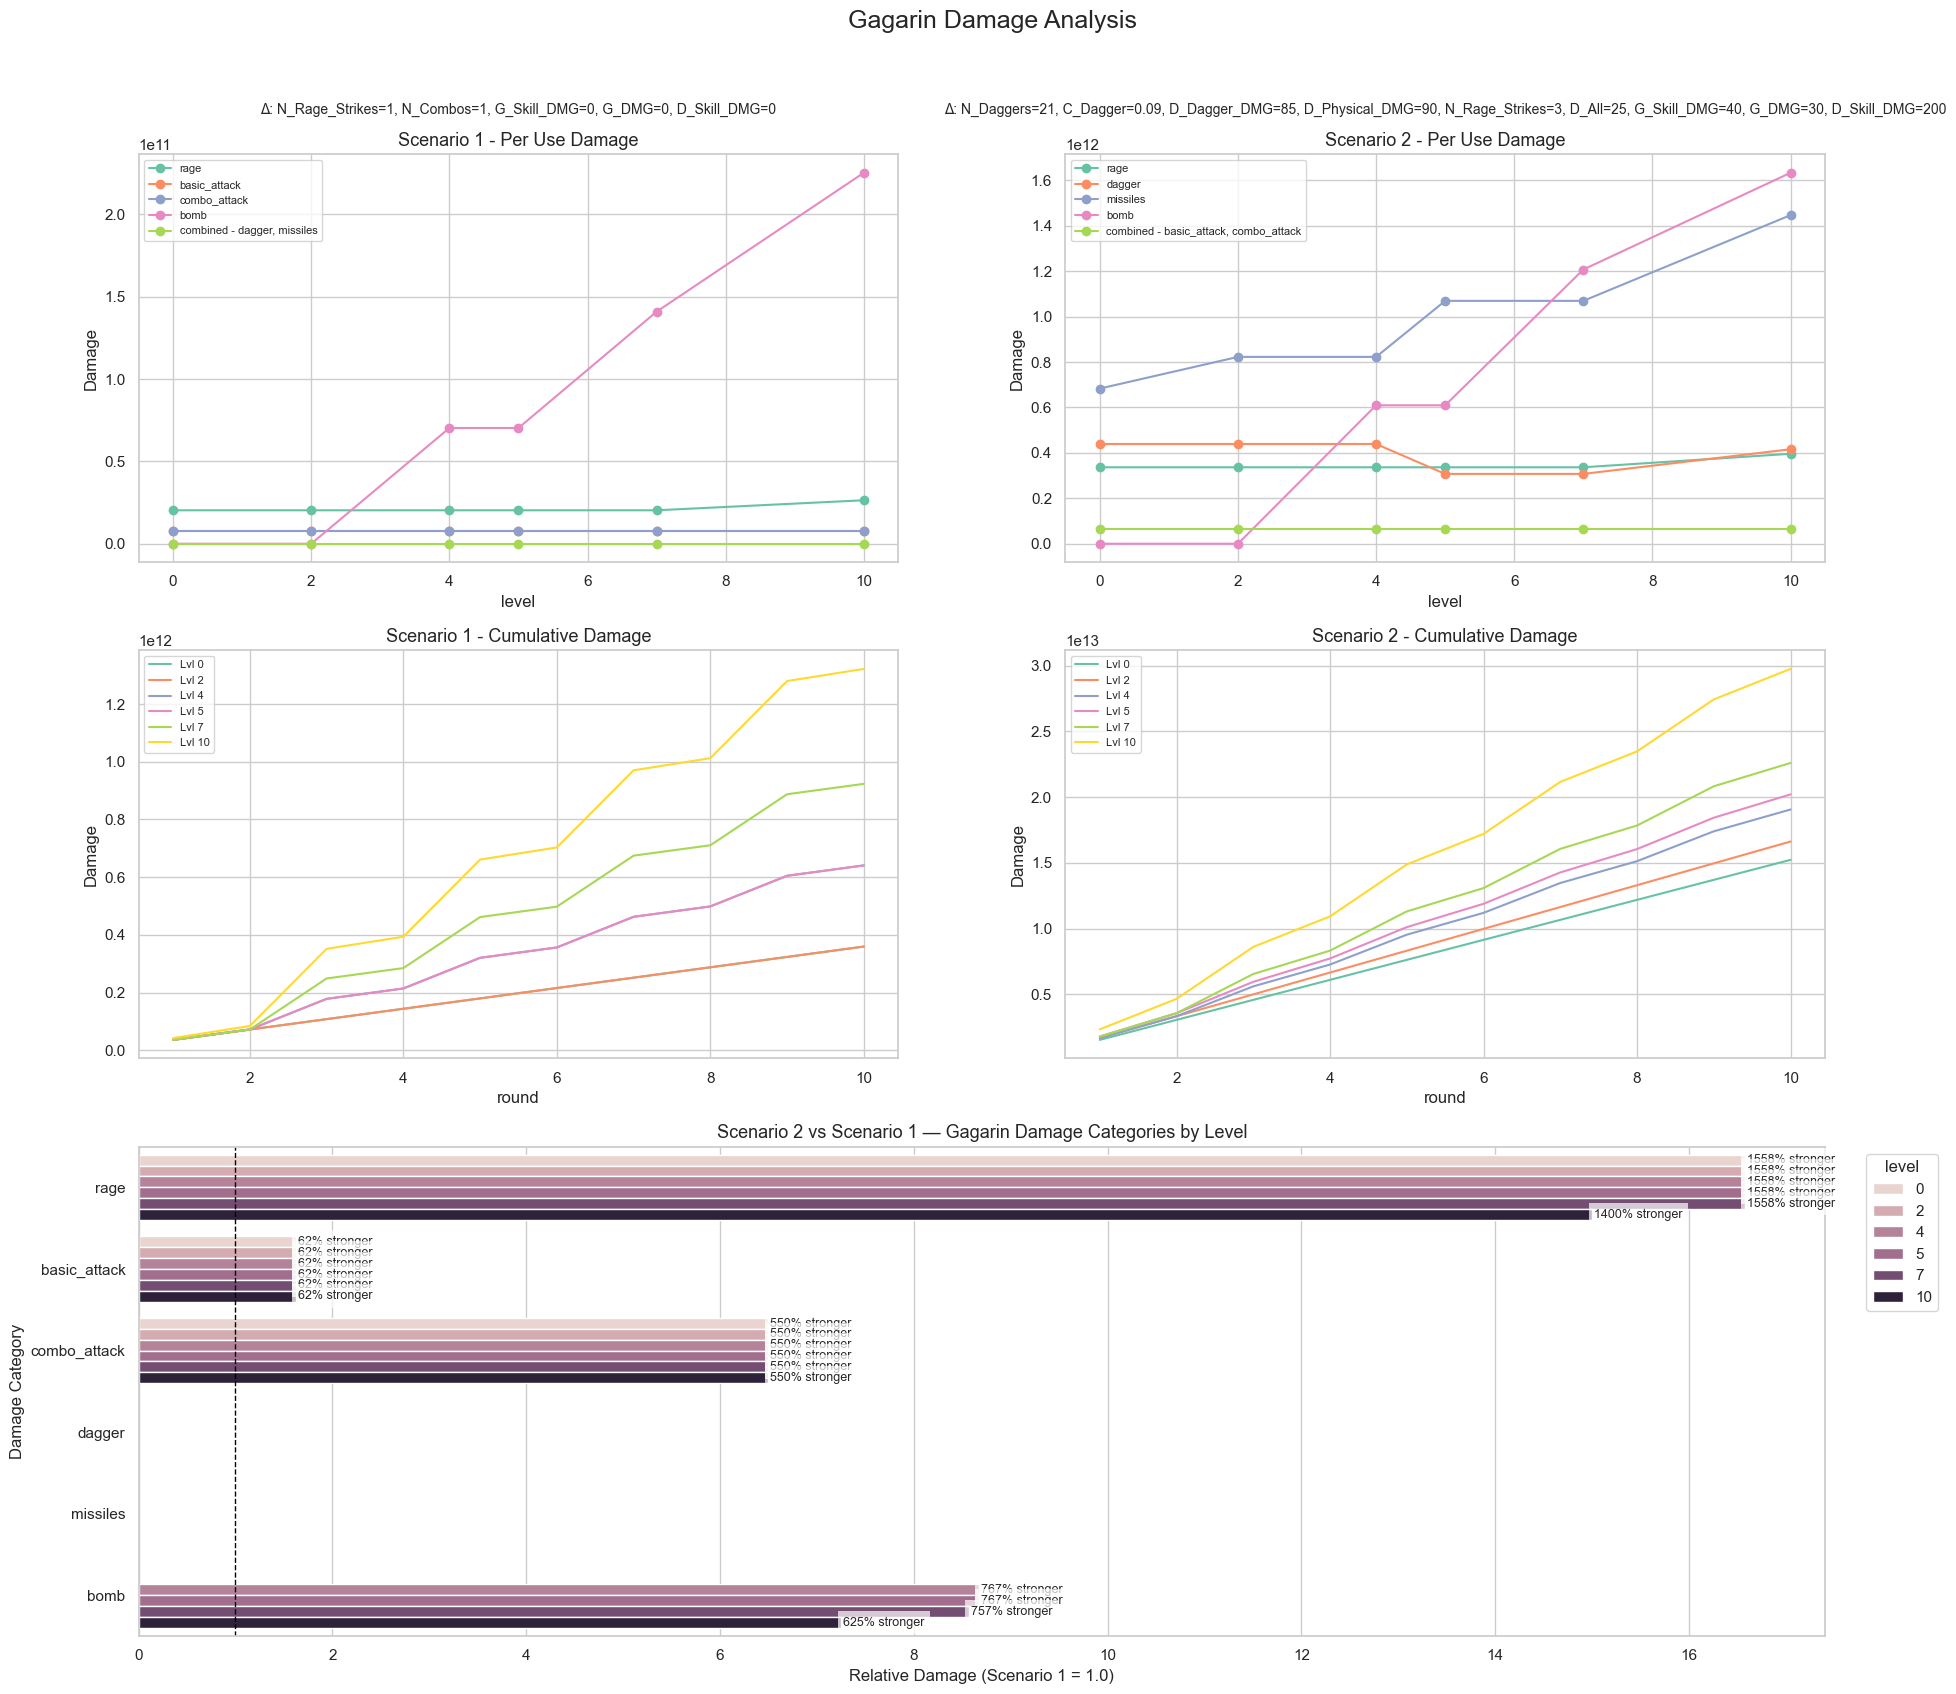

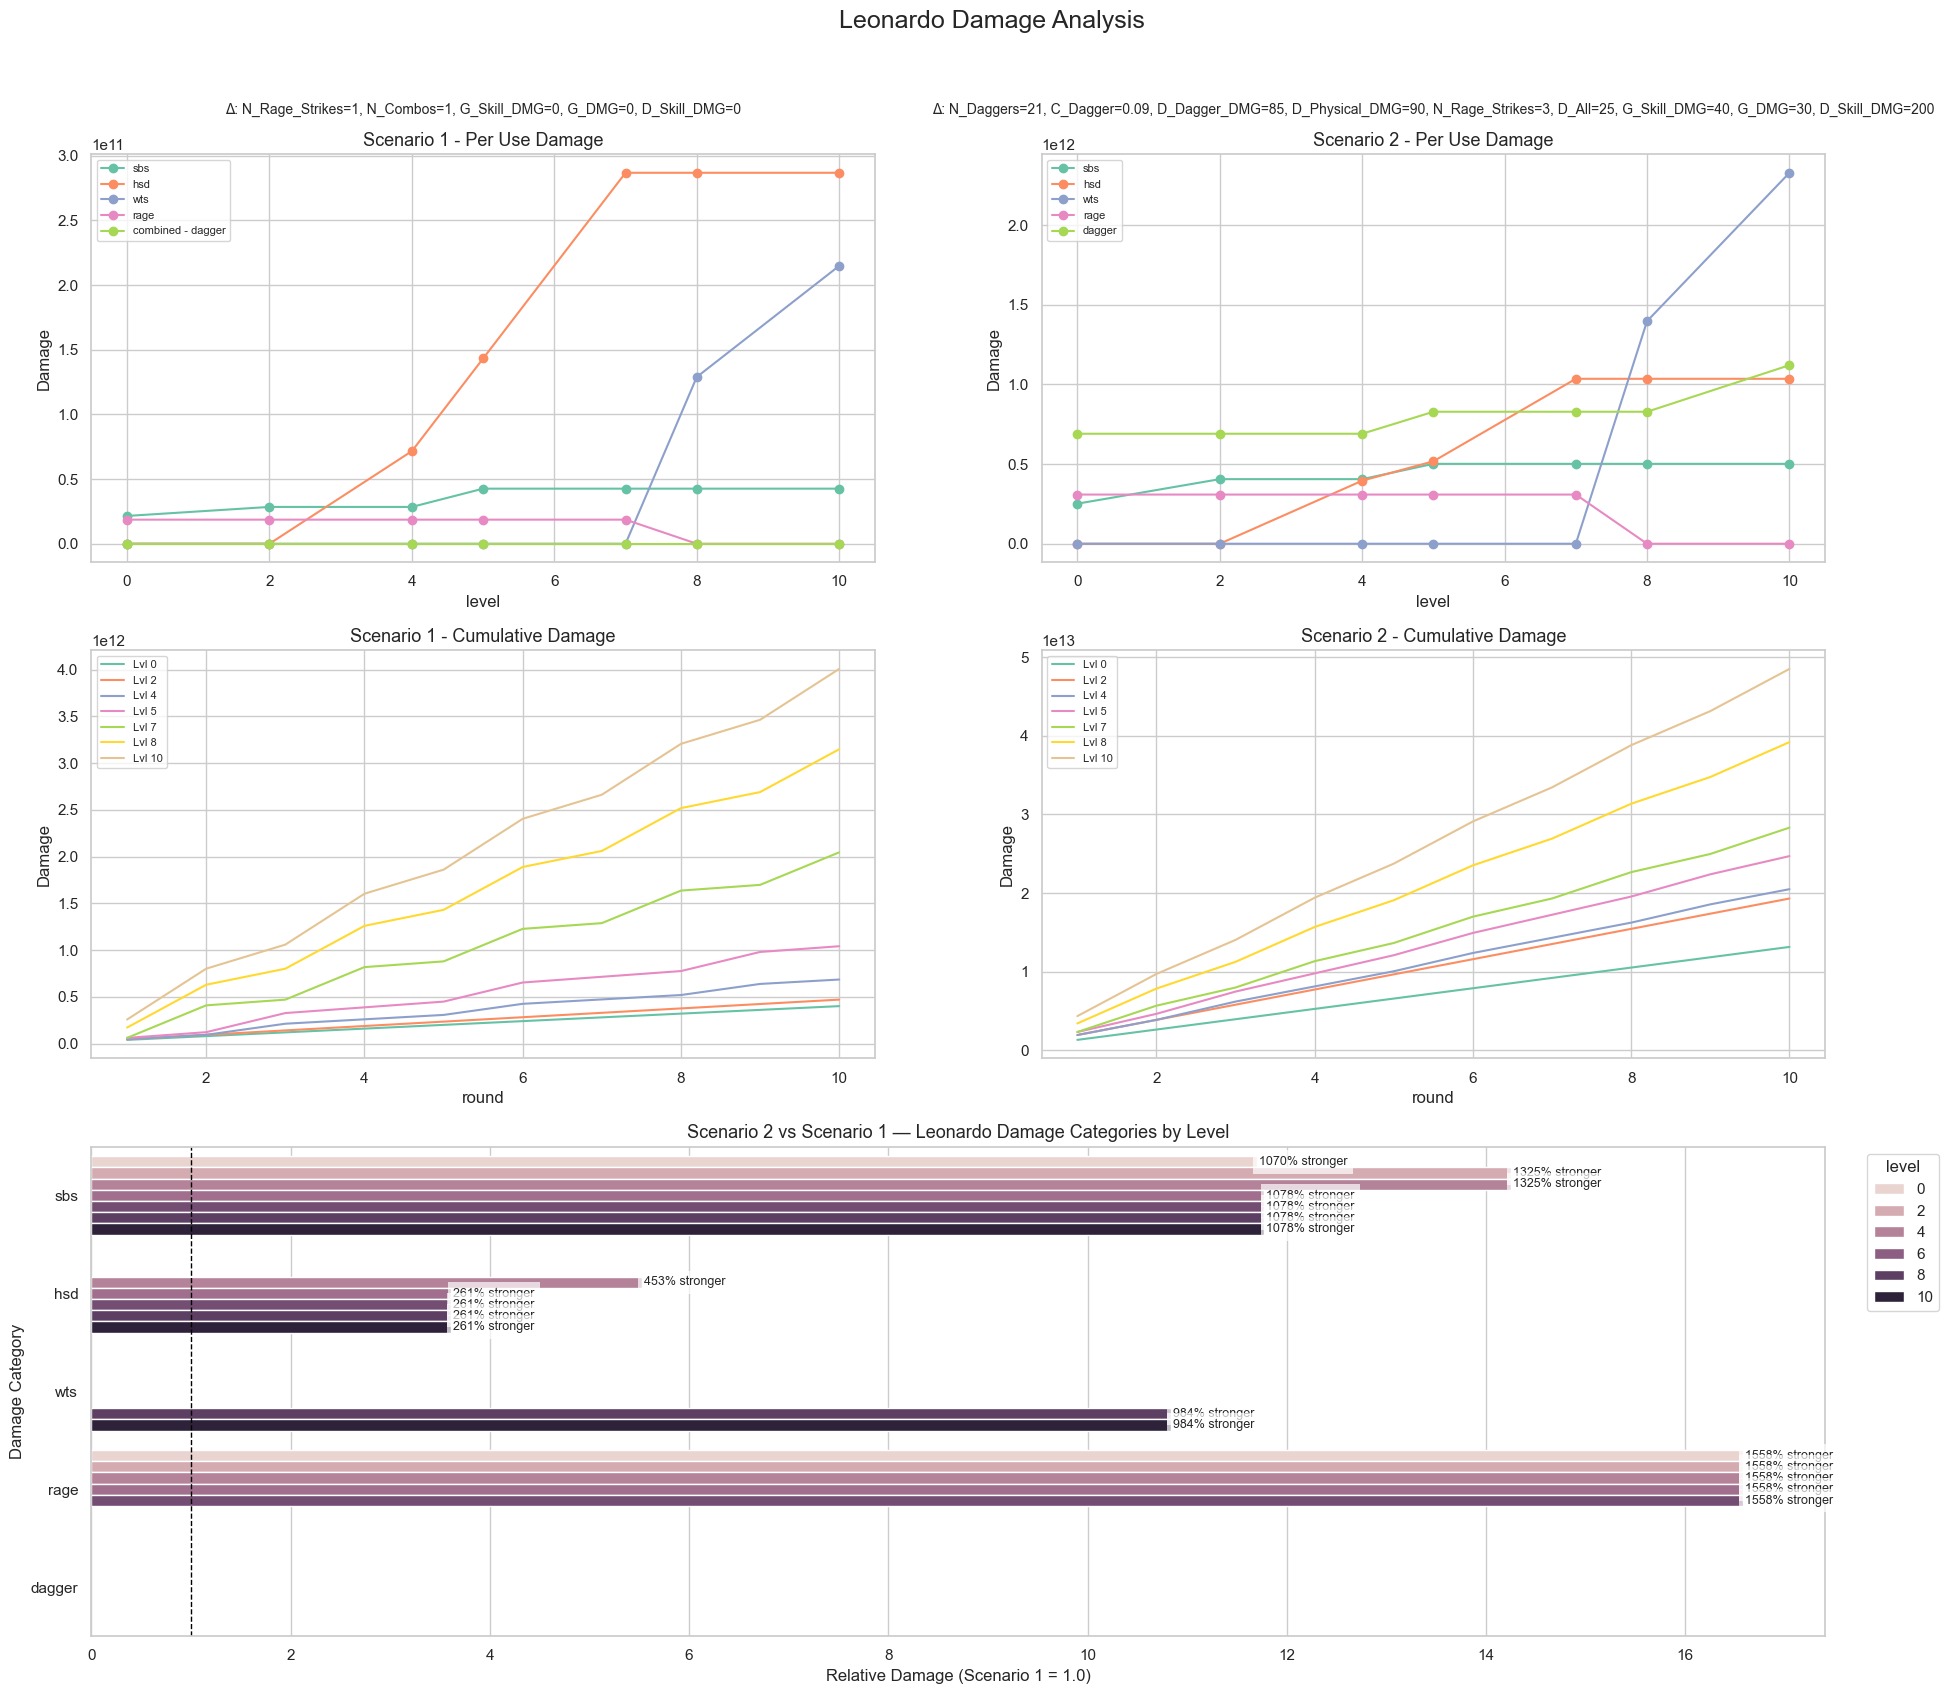

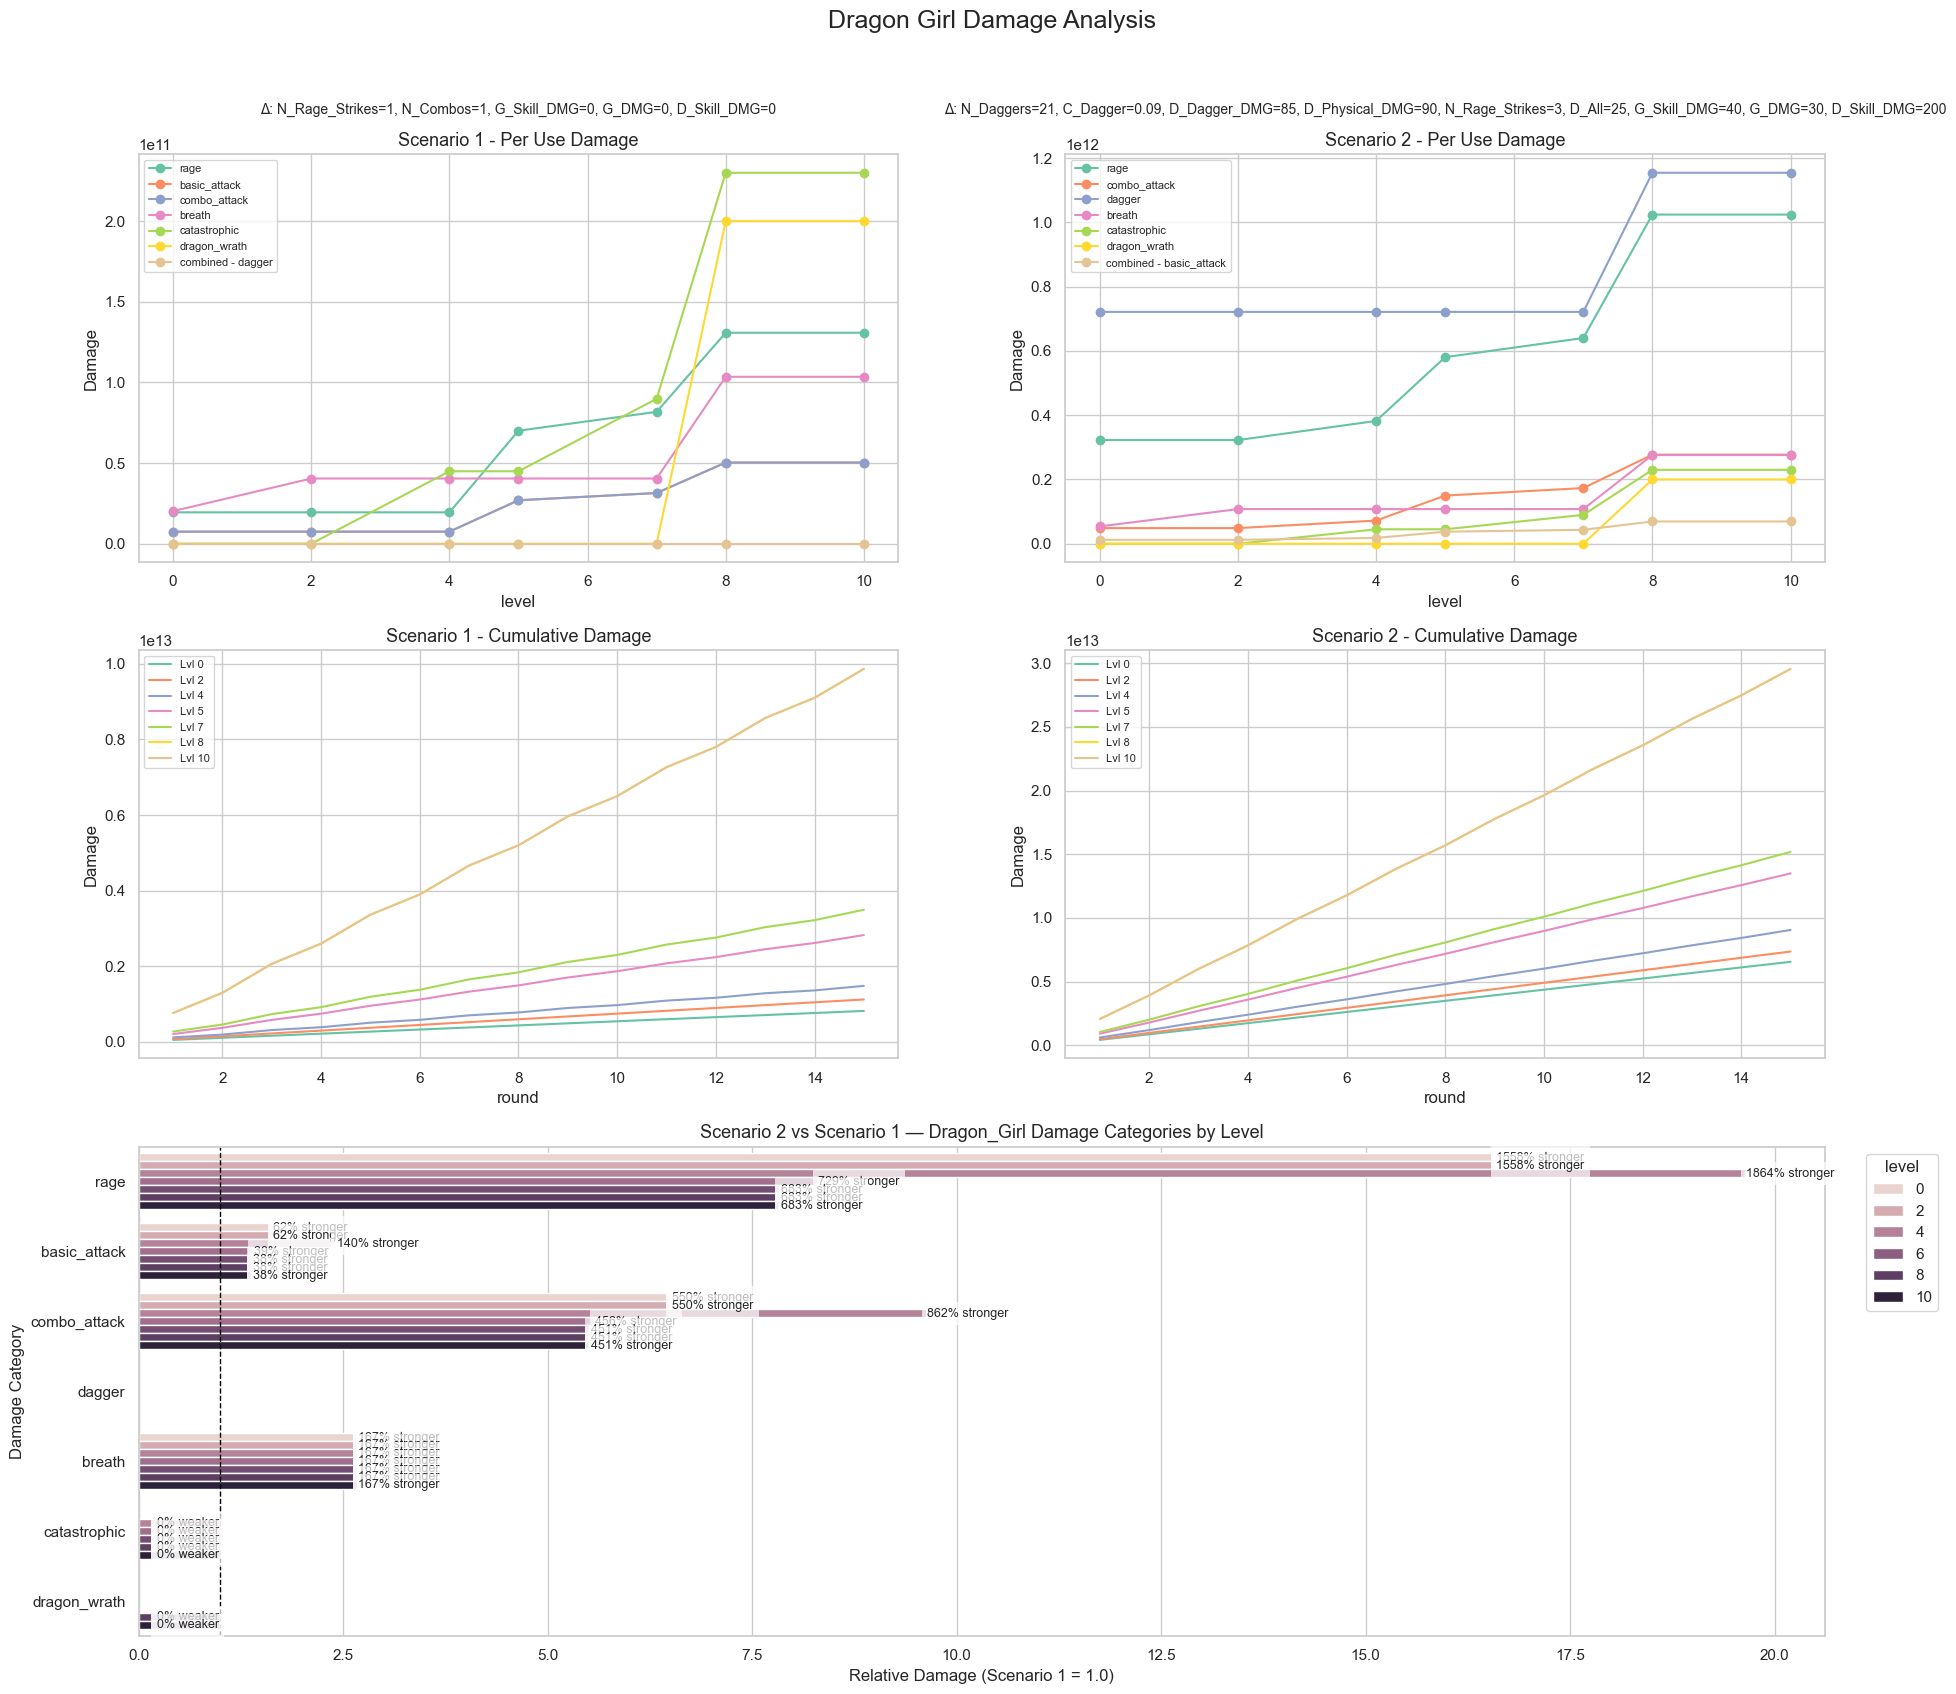

In [15]:
SCENARIO_NAME_MAP = {
    "Scenario 1": SCENARIO_1["name"],
    "Scenario 2": SCENARIO_2["name"],
}


plot_damage_analysis(
    df_all_skills,
    df_all_rounds,
    source="gagarin",
    scenario_name_map=SCENARIO_NAME_MAP,
    title_override="Gagarin Damage Analysis"
)

plot_damage_analysis(
    df_all_skills,
    df_all_rounds,
    source="leonardo",
    scenario_name_map=SCENARIO_NAME_MAP,
    title_override="Leonardo Damage Analysis"
)

plot_damage_analysis(
    df_all_skills,
    df_all_rounds,
    source="dragon_girl",
    scenario_name_map=SCENARIO_NAME_MAP,
    title_override="Dragon Girl Damage Analysis",
)


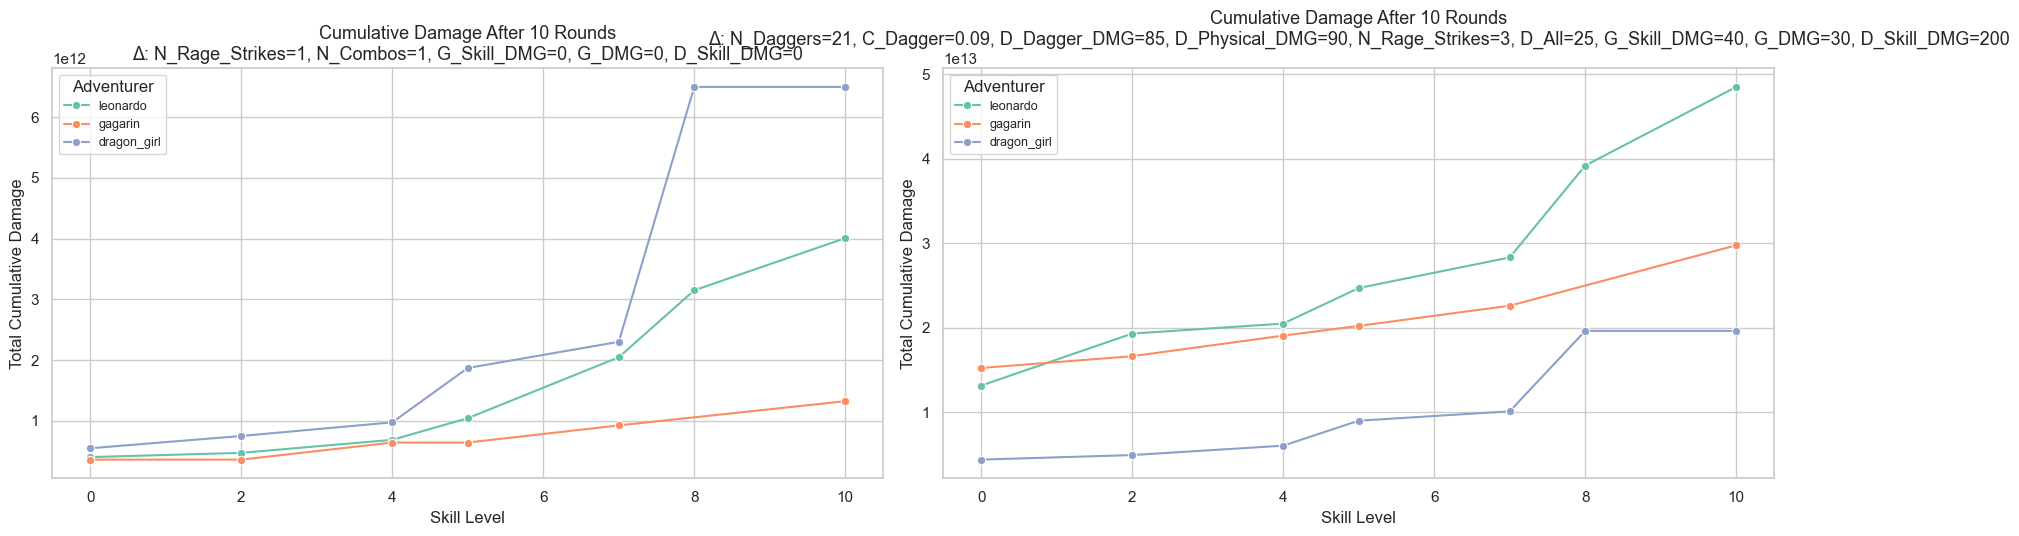

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter to Round 10 if not already filtered
df_final_round = df_all_rounds[df_all_rounds["round"] == 10].copy()

# Step 2: Ensure numeric types
df_final_round["level"] = pd.to_numeric(df_final_round["level"], errors="coerce")
df_final_round["total_damage"] = pd.to_numeric(df_final_round["total_damage"], errors="coerce")

# Step 3: Add "stacks_label" only for Dragon Girl
df_final_round["stacks_label"] = ""
if "stacks" in df_final_round.columns:
    dg_mask = df_final_round["source"].str.lower().str.contains("dragon")
    df_final_round.loc[dg_mask, "stacks_label"] = " - " + df_final_round.loc[dg_mask, "stacks"].astype(str)

# Step 4: Unified label (e.g., "dragon_girl - 20")
df_final_round["label"] = df_final_round["source"] + df_final_round["stacks_label"]

# Step 5: Create subplot grid
scenarios = df_final_round["scenario"].unique()
fig, axs = plt.subplots(nrows=1, ncols=len(scenarios), figsize=(9 * len(scenarios), 6))
axs = [axs] if len(scenarios) == 1 else axs.flatten()

# Step 6: Plot per scenario
for i, scenario in enumerate(scenarios):
    df_scenario = df_final_round[df_final_round["scenario"] == scenario]
    ax = axs[i]

    sns.lineplot(
        data=df_scenario,
        x="level",
        y="total_damage",
        hue="label",
        marker="o",
        ax=ax
    )

    # Friendly name wrapping
    scenario_name = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    title_wrapped = f"Cumulative Damage After 10 Rounds\n{scenario_name}"
    ax.set_title(title_wrapped, fontsize=13)

    ax.set_ylabel("Total Cumulative Damage")
    ax.set_xlabel("Skill Level")
    ax.legend(title="Adventurer", fontsize=9)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


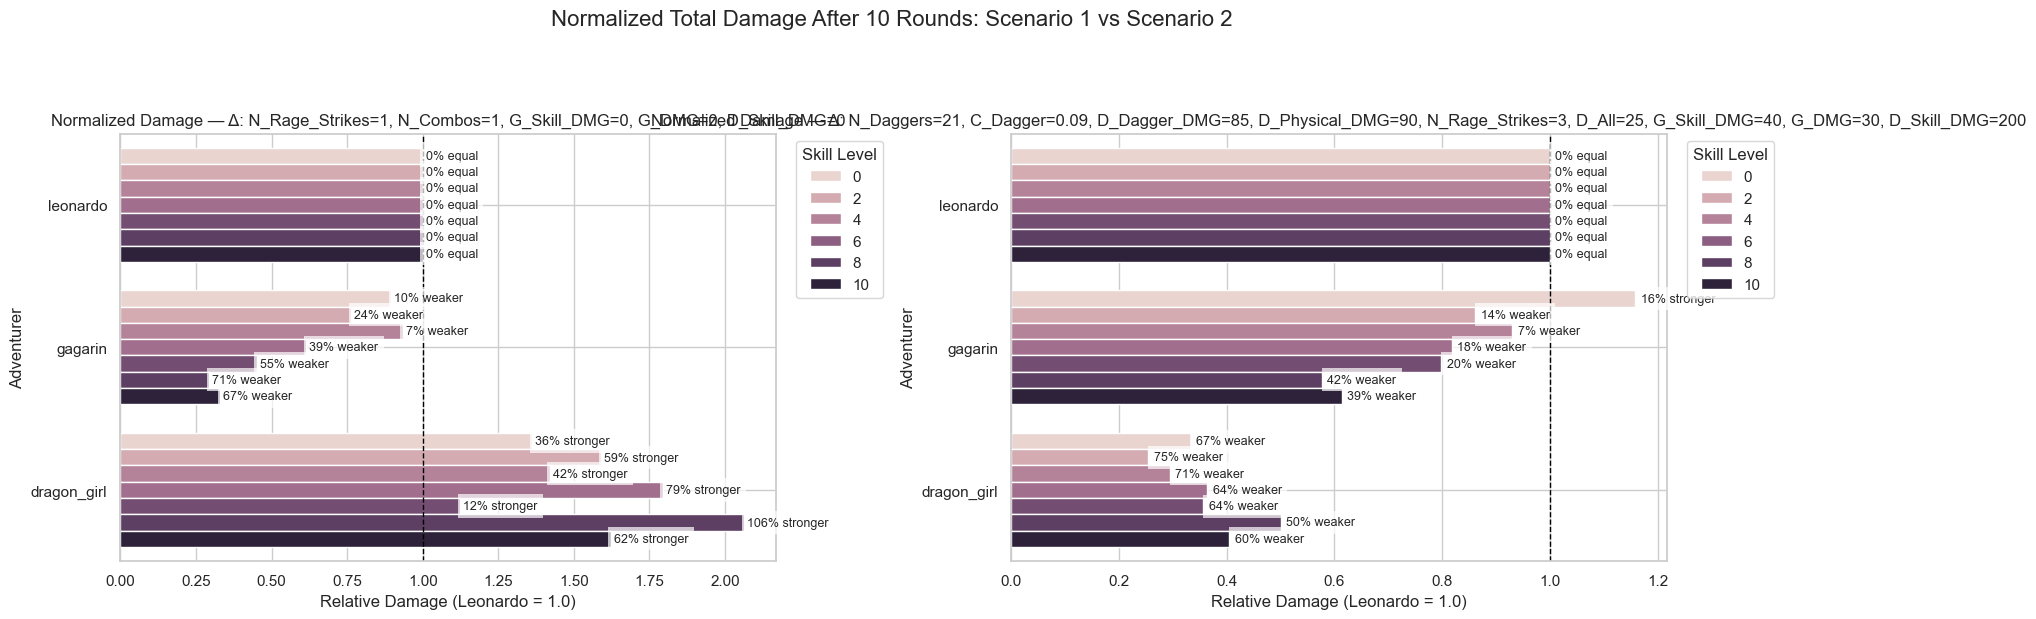

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lowercase column names for consistency
df_final_round.columns = df_final_round.columns.str.lower()

# Filter Gagarin level 7
gaga_lvl7 = df_final_round[
    (df_final_round["source"] == "gagarin") &
    (df_final_round["level"] == 7)
].copy()

# Duplicate and set to level 8
gaga_lvl8 = gaga_lvl7.copy()
gaga_lvl8["level"] = 8

# Append to df_final_round
df_final_round = pd.concat([df_final_round, gaga_lvl8], ignore_index=True)

# === Filter Leonardo for baseline
baseline = df_final_round[df_final_round["source"] == "leonardo"][["scenario", "level", "total_damage"]]
baseline = baseline.rename(columns={"total_damage": "leonardodamage"})

# === Merge to normalize
df_norm = df_final_round.merge(baseline, on=["scenario", "level"], how="left")
df_norm["normalized"] = df_norm["total_damage"] / df_norm["leonardodamage"]

# === Plot setup
unique_scenarios = df_norm["scenario"].unique()
fig, axs = plt.subplots(1, len(unique_scenarios), figsize=(9 * len(unique_scenarios), 6))

if len(unique_scenarios) == 1:
    axs = [axs]

scenario_text = " vs ".join(unique_scenarios)
fig.suptitle(f"Normalized Total Damage After 10 Rounds: {scenario_text}", fontsize=16, y=1.03)

# === Plot per scenario
for i, scenario in enumerate(unique_scenarios):
    df_plot = df_norm[(df_norm["scenario"] == scenario) & df_norm["normalized"].notna()]
    ax = axs[i]

    sns.barplot(
        data=df_plot,
        y="label",
        x="normalized",
        hue="level",
        orient="h",
        dodge=True,
        ax=ax
    )

    ax.axvline(1.0, color="black", linestyle="--", linewidth=1)
    title = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    ax.set_title(f"Normalized Damage — {title}")
    ax.set_xlabel("Relative Damage (Leonardo = 1.0)")
    ax.set_ylabel("Adventurer")

    # Annotate bars
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            if pd.notna(width):
                diff_pct = (width - 1) * 100
                label = f"{abs(diff_pct):.0f}% {'stronger' if diff_pct > 0 else 'weaker' if diff_pct < 0 else 'equal'}"
                text_x = width + 0.01 if width > 0 else width - 0.01
                text_y = bar.get_y() + bar.get_height() / 2
                ax.text(
                    text_x,
                    text_y,
                    label,
                    va="center",
                    ha="left" if width > 0 else "right",
                    fontsize=9,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
                )

    ax.legend(title="Skill Level", bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


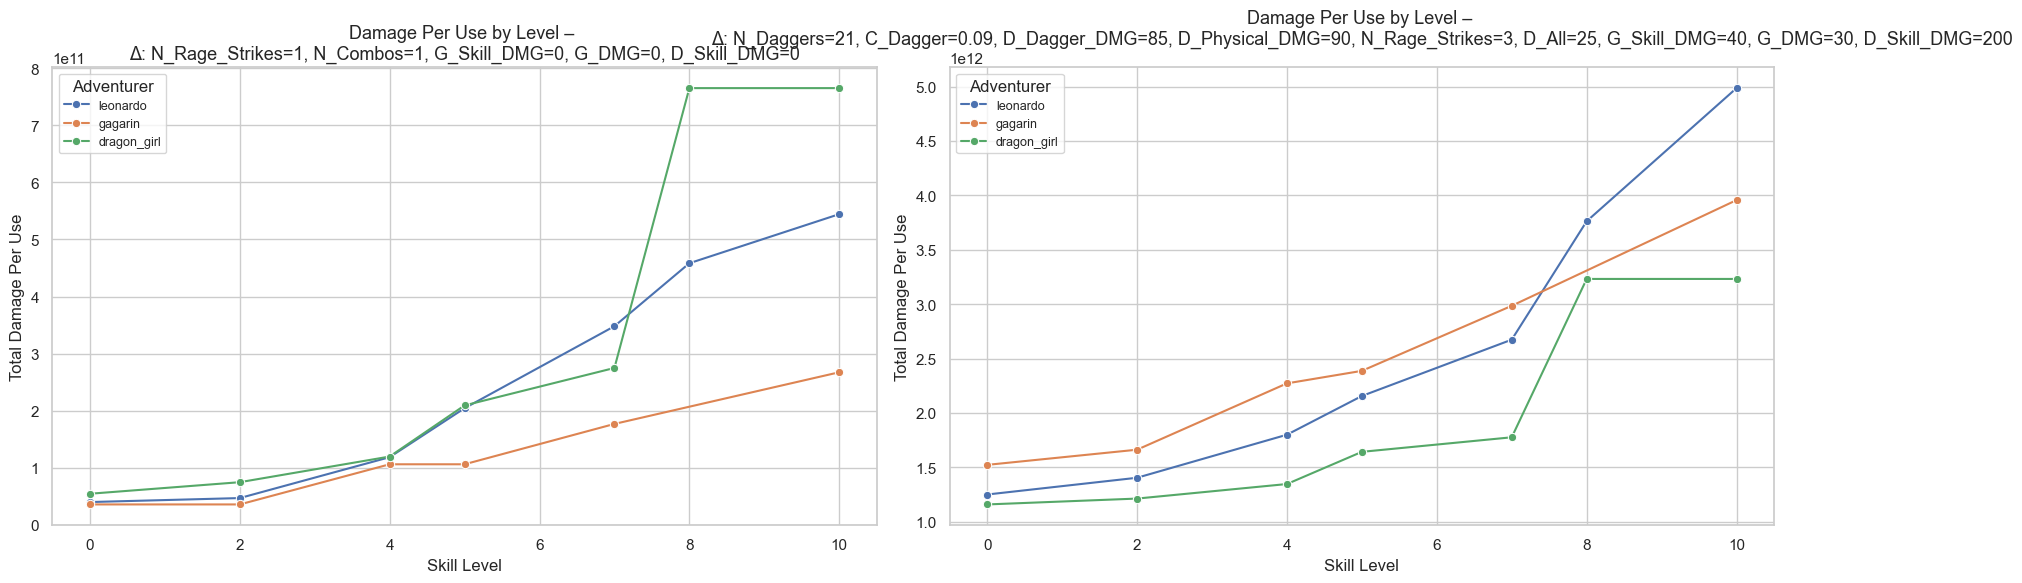

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Ensure damage column is numeric
df_all_skills["damage_per_use"] = pd.to_numeric(df_all_skills["total"], errors="coerce")

# === Add "stacks_label" for Dragon Girl clarity
df_all_skills["stacks_label"] = ""
if "stacks" in df_all_skills.columns:
    dg_mask = df_all_skills["source"].str.lower().str.contains("dragon")
    df_all_skills.loc[dg_mask, "stacks_label"] = " - " + df_all_skills.loc[dg_mask, "stacks"].astype(str)

# === Create unified label
df_all_skills["label"] = df_all_skills["source"] + df_all_skills["stacks_label"]

# === Ensure proper datatypes
df_all_skills["level"] = pd.to_numeric(df_all_skills["level"], errors="coerce")
df_all_skills["scenario"] = df_all_skills["scenario"].astype(str)

# === Plot aesthetics
sns.set(style="whitegrid")
scenarios = df_all_skills["scenario"].unique()

# === Create subplots by scenario
fig, axs = plt.subplots(nrows=1, ncols=len(scenarios), figsize=(9 * len(scenarios), 6))
axs = [axs] if len(scenarios) == 1 else axs.flatten()

for i, scenario in enumerate(scenarios):
    ax = axs[i]
    df_scenario = df_all_skills[df_all_skills["scenario"] == scenario]

    sns.lineplot(
        data=df_scenario,
        x="level",
        y="damage_per_use",
        hue="label",
        marker="o",
        ax=ax
    )

    # Friendly title using optional map
    scenario_name = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    title = f"Damage Per Use by Level – \n{scenario_name}"
    ax.set_title(title, fontsize=13)

    ax.set_ylabel("Total Damage Per Use")
    ax.set_xlabel("Skill Level")
    ax.grid(True)
    ax.legend(title="Adventurer", fontsize=9)

plt.tight_layout()
plt.show()


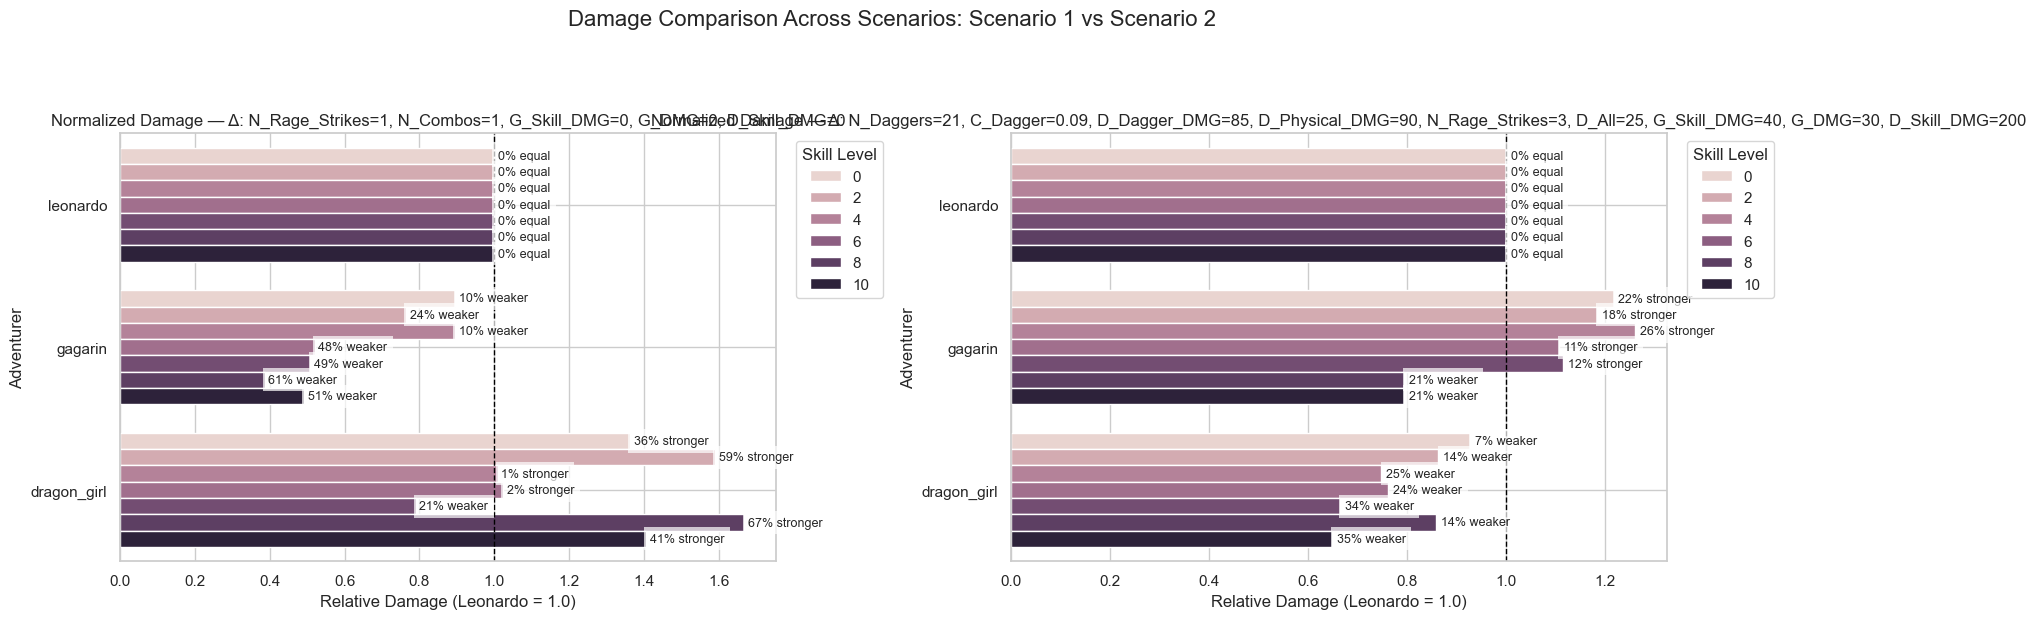

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Ensure lowercase column names ===
df_all_skills.columns = df_all_skills.columns.str.lower()

# === Filter Gagarin level 7 and duplicate as level 8
gaga_lvl7 = df_all_skills[
    (df_all_skills["source"] == "gagarin") &
    (df_all_skills["level"] == 7)
].copy()

gaga_lvl8 = gaga_lvl7.copy()
gaga_lvl8["level"] = 8

df_all_skills = pd.concat([df_all_skills, gaga_lvl8], ignore_index=True)

# === Ensure numeric damage
df_all_skills["damageperuse"] = pd.to_numeric(df_all_skills["total"], errors="coerce")

# === Add stacks label (only for dragon girl)
df_all_skills["stackslabel"] = ""
if "stacks" in df_all_skills.columns:
    dg_mask = df_all_skills["source"] == "dragon_girl"
    df_all_skills.loc[dg_mask, "stackslabel"] = " - " + df_all_skills.loc[dg_mask, "stacks"].astype(str)

# === Combined label
df_all_skills["label"] = df_all_skills["source"] + df_all_skills["stackslabel"]

# === Baseline: Leonardo
baseline = df_all_skills[df_all_skills["source"] == "leonardo"][["scenario", "level", "damageperuse"]]
baseline = baseline.rename(columns={"damageperuse": "leonardodamage"})

# === Merge to get normalized damage
df_norm = df_all_skills.merge(baseline, on=["scenario", "level"], how="left")
df_norm["normalized"] = df_norm["damageperuse"] / df_norm["leonardodamage"]

# === Plot
unique_scenarios = df_norm["scenario"].unique()
fig, axs = plt.subplots(1, len(unique_scenarios), figsize=(9 * len(unique_scenarios), 6))

if len(unique_scenarios) == 1:
    axs = [axs]

scenario_text = " vs ".join(unique_scenarios)
fig.suptitle(f"Damage Comparison Across Scenarios: {scenario_text}", fontsize=16, y=1.03)

for i, scenario in enumerate(unique_scenarios):
    df_plot = df_norm[(df_norm["scenario"] == scenario) & df_norm["normalized"].notna()]
    ax = axs[i]

    sns.barplot(
        data=df_plot,
        y="label",
        x="normalized",
        hue="level",
        orient="h",
        dodge=True,
        ax=ax
    )

    ax.axvline(1.0, color="black", linestyle="--", linewidth=1)
    title = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    ax.set_title(f"Normalized Damage — {title}")
    ax.set_xlabel("Relative Damage (Leonardo = 1.0)")
    ax.set_ylabel("Adventurer")

    # Annotate bars
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            if pd.notna(width):
                diff_pct = (width - 1) * 100
                label = f"{abs(diff_pct):.0f}% {'stronger' if diff_pct > 0 else 'weaker' if diff_pct < 0 else 'equal'}"
                text_x = width + 0.01 if width > 0 else width - 0.01
                text_y = bar.get_y() + bar.get_height() / 2
                ax.text(
                    text_x,
                    text_y,
                    label,
                    va="center",
                    ha="left" if width > 0 else "right",
                    fontsize=9,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
                )

    ax.legend(title="Skill Level", bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
